### Jupyter for making figure for fastDMF+plastic FIC
#### I.- Inhibitory homeostatic plasticity rule enhances model stability and plausibility
    
    1.- Decay vs Learning rate relationship for different objective firing rates    
    2.- Firing Rate comparison between static vs dynamic FIC    
    3.- Convergence of dynamic FIC to the linear solution
    4.- Comparison of firing rate under neuromodulation


#### II.- Fitting to fMRI

    1.- Objective function for static and dynamics FIC for FC    
    2.- Violin plot of the fit to FC at the optimum    
    3.- Objective function for static and dynamics FIC for FCD    
    4.- Violin plot of the fit to FCD at the optimum


#### III.- A potential mechanism for whole-brain slow-waves
    1.- G vs LR Parameter space with autocorrelation peak
    2.- G vs LR Parameter space with autocorrelation time to peak
    3.- Average firing rate trace at slow wave region
    4.- Average firing rate trace at no-slow wave region (best fit to wake data)

In [2]:
# ! pip install mat73

In [55]:
import os
import time
import seaborn as sns
import numpy as np
import pandas as pd
# import fastdyn_fic_dmf as dmf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from scipy import stats
import mat73
from scipy.stats import pearsonr
from scipy.spatial.distance import cdist
from matplotlib.gridspec import GridSpec
from helper_functions import filter_bold
from nilearn import plotting, datasets
datafolder = '/home/ivan.mindlin/Desktop/DatosParaRuben/'
figfold = '/home/ivan.mindlin/Desktop/DatosParaRuben/Figuras/panels/'


### I.- Inhibitory homeostatic plasticity rule enhances model stability and plausibility

In [ ]:


# Homeostatic fit
hom_fit_list = [] # 0=1.22, 1=3.44, 2=6.88, 3=50
hom_fit_list.append(np.load(datafolder+'ChequeoPreliminar/HomeostaticFit1-22-Grid/hom_grid.npy'))
hom_fit_list.append(np.load(datafolder+'ChequeoPreliminar/HomeostaticFit3-44-Grid/hom_grid.npy'))
hom_fit_list.append(np.load(datafolder+'ChequeoPreliminar/HomeostaticFit6-88-Grid/hom_grid.npy'))
hom_fit_list.append(np.load(datafolder+'ChequeoPreliminar/HomeostaticFit50-Grid/hom_grid.npy'))

fic_corr = np.load(datafolder+'ChequeoPreliminar/fic_cor_timeseries_grid.npy')

# Static vs Dynamic FIC comparison
all_rates_stat = np.load(datafolder+'ChequeoPreliminar/avg_fr_stat_values.npy')
all_rates_dyn = np.load(datafolder+'ChequeoPreliminar/avg_fr_dyn_values.npy')
fic_t = np.load(datafolder+'ChequeoPreliminar/dyn_fic_values.npy')
static_fic = np.load(datafolder+'ChequeoPreliminar/stat_fic_values.npy')

# Neuromodulation
nm_mean_fr = [] # 0 is static, 1 dynamic
nm_std_fr = [] # 0 is static, 1 dynamic
nm_fc = [] # 0 is static, 1 dynamic
nm_fcd = [] # 0 is static, 1 dynamic
nm_mean_fr.append(np.load(datafolder+'neuromod/staticD2/mean_fr_grid.npy'))
nm_mean_fr.append(np.load(datafolder+'neuromod/dynamicD2/mean_fr_grid.npy'))
nm_std_fr.append(np.load(datafolder+'neuromod/staticD2/std_fr_grid.npy'))
nm_std_fr.append(np.load(datafolder+'neuromod/dynamicD2/std_fr_grid.npy'))
# nm_fc.append(np.load(datafolder+'neuromod/static/mean_fc_grid.npy'))
# nm_fc.append(np.load(datafolder+'neuromod/dynamic/mean_fc_grid.npy'))
# nm_fcd.append(np.load(datafolder+'neuromod/static/sim_stds_grid.npy'))
# nm_fcd.append(np.load(datafolder+'neuromod/dynamic/sim_stds_grid.npy'))

# Slow waves
peak_val_ac_grid = np.load(datafolder+'slow_waves/peak_autocorrelation_grid.npy')
peak_time_ac_grid = np.load(datafolder+'slow_waves/peak_time_grid.npy')
corr_to_sc_grid = np.load(datafolder+'slow_waves/corr_to_sc_grid.npy')
rates_grid = np.load(datafolder+'slow_waves/rates_grid.npy')
homeo_fit_grid = np.load(datafolder+'slow_waves/homeostatic_fittness_grid.npy')

# Font sizes
TITLE = 18
LABEL = 14
TICKS = 12
LEGEND = 12
COLORBAR = 14


### Fig 1

In [3]:

rates = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar/example_rates.npy')
rates_inh = np.load( '/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar/example_rates_inh.npy')
bold = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar/example_bold.npy')
fic_t = np.load( '/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar/example_fic_t.npy')

In [4]:
sns.set_style("dark")

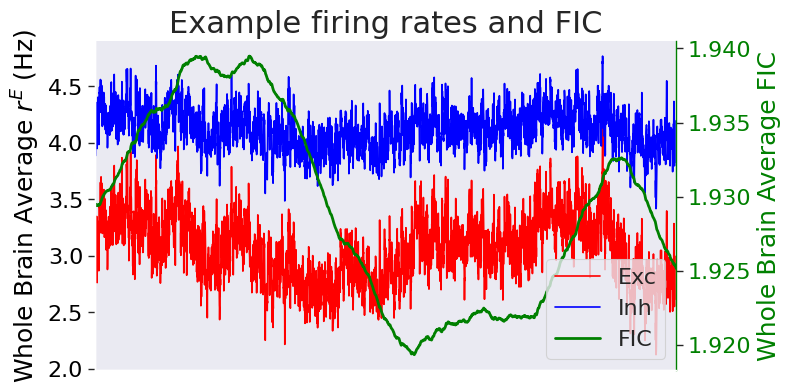

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Font sizes
TITLE = 22
LABEL = 18
TICKS = 16
LEGEND = 16

# Parameters
figname = 'FIG_1'

# Example data (replace these with your actual data)
acor_tbase = np.arange(5000)#np.arange(rates.shape[1])  # x-axis data
max_t = len(acor_tbase)

# Create the figure and primary axis
fig, ax = plt.subplots(figsize=(8, 4))

# Plot 'rates' data on the primary y-axis
ax.plot(acor_tbase, np.mean(rates[:,:max_t], axis=0), color='red', label='Exc')
ax.plot(acor_tbase, np.mean(rates_inh[:,:max_t], axis=0), color='blue', label='Inh')

# Labels and title for the primary axis
ax.set_ylabel('Whole Brain Average $r^E$ (Hz)', color='black', fontsize=LABEL)
ax.set_title('Example firing rates and FIC', fontsize=TITLE)
ax.tick_params(axis='y', labelcolor='black', labelsize=TICKS)
ax.set_xlim([0, max_t])

# Create a twin axis sharing the same x-axis for 'fic_t'
ax2 = ax.twinx()
ax2.plot(acor_tbase, np.mean(fic_t[:,:max_t], axis=0), color='green', linewidth=2, label='FIC')

# Labels for the secondary axis
ax2.set_ylabel('Whole Brain Average FIC', color='green', fontsize=LABEL)
ax2.tick_params(axis='y', labelcolor='green', labelsize=TICKS)
ax2.spines['right'].set_color('green')

# Customize spines for a cleaner look
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Optionally hide x-axis labels and ticks
ax.set_xticklabels([])
ax.set_xlabel('')  # Comment this line if you want the x-axis label

# Add legends for both axes
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right', fontsize=LEGEND)

# Layout and save
plt.tight_layout()
fig.savefig(figfold + figname + '_A.svg', dpi=300)
fig.savefig(figfold + figname + '_A.png', dpi=300)
plt.show()


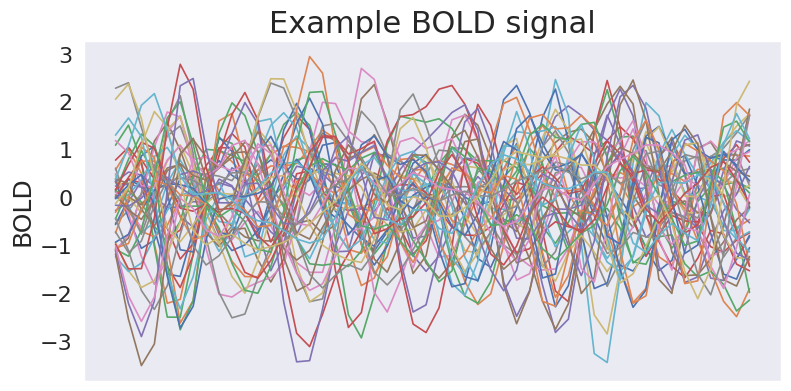

In [17]:
from helper_functions import filter_bold
# PLot the BOLD signal as Fig_1_b
# Parameters
figname = 'FIG_1'
plt.figure(figsize=(8, 4))
bold = filter_bold(bold.T, 0.01, 0.1, 2)
plt.plot(bold[:50,:50])

plt.title('Example BOLD signal', fontsize=TITLE)
plt.ylabel('BOLD', fontsize=LABEL)
#plt.xlabel('Time (s)', fontsize=LABEL)
plt.xlabel('')
#plt.xticks(fontsize=TICKS)
# Elminate xticklabels
plt.xticks([])
plt.yticks(fontsize=TICKS)

plt.tight_layout()
plt.savefig(figfold + figname + '_B.svg', dpi=300)
plt.savefig(figfold + figname + '_B.png', dpi=300)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from nilearn import datasets, plotting

# Load connectivity matrix
C = loadmat('./data/DTI_fiber_consensus_HCP.mat')['connectivity'][:200, :200]

# Fetch Schaefer atlas (200 regions)
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200)
atlas_img = atlas.maps

# Obtain coordinates from atlas image
coords = plotting.find_parcellation_cut_coords(atlas_img)

# Ensure SC matrix size matches coordinates
assert C.shape[0] == len(coords), f"Mismatch: SC matrix ({C.shape[0]}), coordinates ({len(coords)})"



[get_dataset_dir] Dataset found in /home/ivan.mindlin/nilearn_data/schaefer_2018


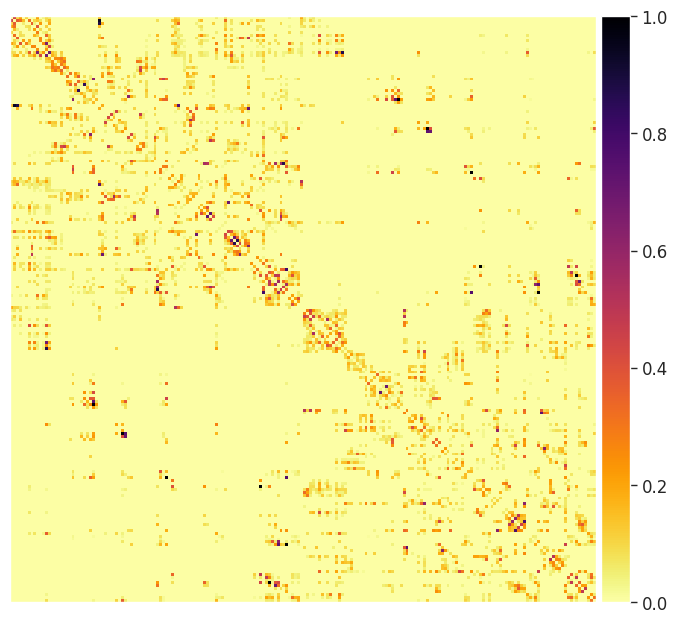

In [14]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(8, 8))
# normalize by the max value the SC matrix
C = C / np.max(C)
# Plot the connectivity matrix
disp = plotting.plot_matrix(C, colorbar=True, cmap='inferno_r', axes=ax)

# Adjust the colorbar position
cbar = disp.colorbar
cbar.ax.yaxis.set_ticks_position('right')  # Move ticks to the right
cbar.ax.yaxis.set_tick_params(labelsize=12)  # Adjust tick label size

# Remove ticks from the matrix plot
disp.axes.set_xticks([])
disp.axes.set_yticks([])

# Save the figure as SVG and PNG
fig.savefig(figfold + figname + '_C.svg', dpi=300, bbox_inches='tight')
fig.savefig(figfold + figname + '_C.png', dpi=300, bbox_inches='tight')

plt.show()

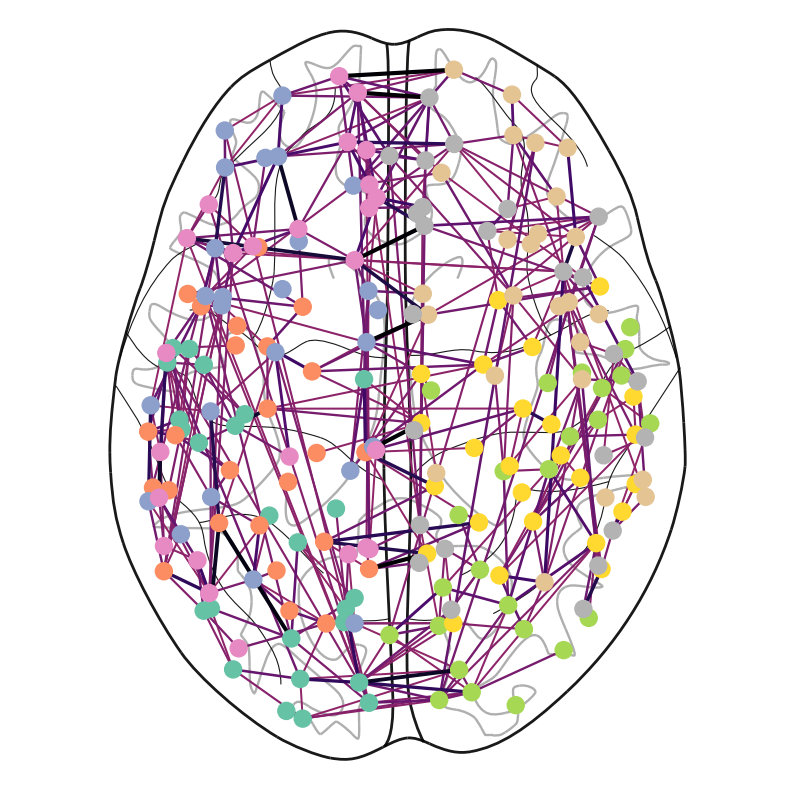

<Figure size 640x480 with 0 Axes>

: 

In [50]:

fig,ax = plt.subplots(figsize=(10,10))
# Plot connectome on brain surface
plotting.plot_connectome(C, coords, axes=ax,
                         node_size=150, edge_threshold="98%",
                         edge_cmap='inferno_r', display_mode='z',annotate=False,alpha=0.9)


plt.show()
plt.tight_layout()
fig.savefig(figfold + figname + '_D.svg', dpi=300)
fig.savefig(figfold + figname + '_D.png', dpi=300)

In [44]:
figfold + figname + '_D.png'

'/home/ivan.mindlin/Desktop/DatosParaRuben/Figuras/panels/FIG_1_D.png'

: 

In [ ]:



ax.plot(acor_tbase, np.mean(e_rates_tseries[e, :, :max_t], axis=0), color=col_pal[3+e])
    
# Create a twin Axes for the right y-axis
ax2 = ax.twinx()
ax2.plot(acor_tbase, np.mean(fic_tseries[e, :, :max_t], axis=0), color='green', linewidth=2)  # Plot on the right y-axis

ax.set_ylabel(r'Whole Brain Average $r^E$ (Hz)')
ax2.set_ylabel(r'Whole Brain Average FIC', color='green')
# Set the color of the ticks and tick labels on the right y-axis
ax2.yaxis.set_tick_params(color='green', labelcolor='green')    
# Set the color of the vertical axis line on the right y-axis
ax2.spines['right'].set_color('green')
if e==2:
    ax.set_xlabel('Time (ms)')
else:
    ax.set_xticks([])
ax.set_title(f'G= {gvals_tseries[e]}')
plt.xlim([0,max_t])

ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

: 

#### Homeostatic Fit

In [52]:
# HOMEOSTATIC FIT
# Extracting averages over the range of G
G_range = np.arange(0,8.5, 0.5)
LR_range = np.logspace(0,3,100)
DECAY_range = np.logspace(2,6,110)
obj_rates = [1.22, 3.44, 6.88, 50]

nobjs = len(obj_rates)
ngs = len(G_range)
nlr = len(LR_range)
ndec = len(DECAY_range)
lr_labels = [1, 10, 100, 1000]
dec_labels = [100, 1000, 10000, 100000]

# Mean and average over G
mean_hom_fit = [np.mean(x,axis=2) for x in hom_fit_list]
std_hom_fit = [np.std(x,axis=2) for x in hom_fit_list]

# Extracting Minimum mismatch
min_mm_pos = [np.argmin(np.abs(x),axis=0) for x in mean_hom_fit]

# Fitting linear trend
fit_res = list()
fit_res_2plot = list()
for o in range(nobjs):
    if o==0:
        fit_res.append(np.polyfit(LR_range[21:], min_mm_pos[o][21:], 1))
        fit_res_2plot.append(np.polyfit(range(0,nlr)[21:], min_mm_pos[o][21:], 1))
    else:
        fit_res.append(np.polyfit(LR_range, min_mm_pos[o], 1))
        fit_res_2plot.append(np.polyfit(range(0,nlr), min_mm_pos[o], 1))    
    


### Acá falta el plot con la correlación del promedio del FIC vs la fuerza de conectividad

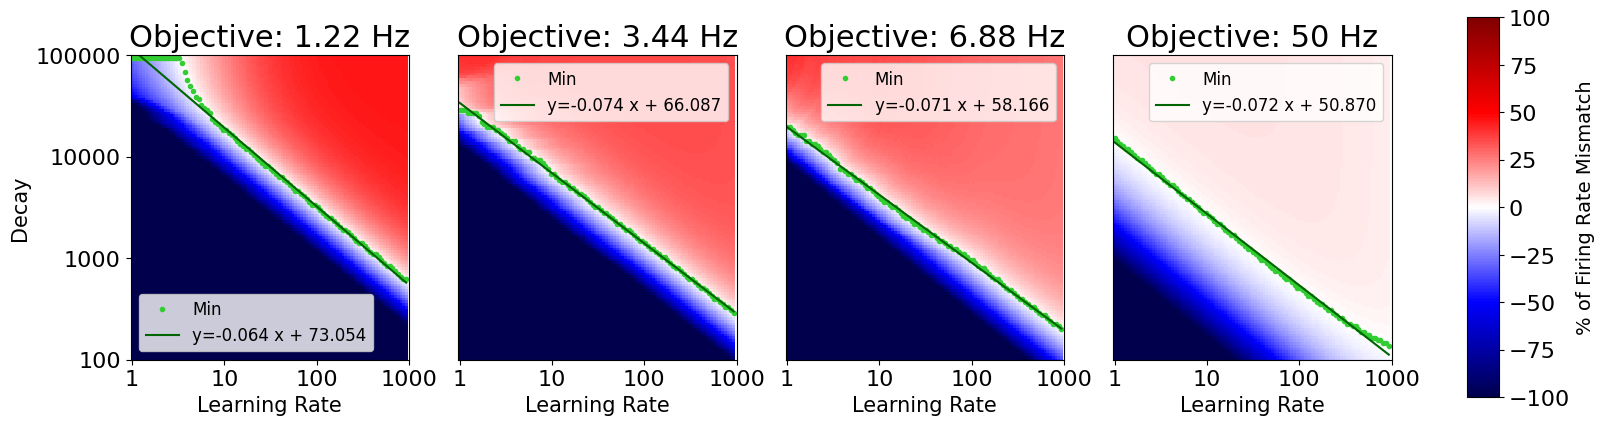

In [58]:
LABEL = 15
LEGEND = 12

# Plotting Average over G
figname = 'FIG_2_A'
fig = plt.figure(figsize=(16, 10))

for o in range(nobjs):
    # Average over G
    ax = plt.subplot(1, nobjs, o + 1)
    plt.imshow(100 * mean_hom_fit[o] / obj_rates[o], vmin=-100, vmax=100, cmap='seismic', 
               origin='lower', interpolation='none')
    plt.plot(range(0, nlr), min_mm_pos[o], '.', label='Min', color='limegreen')
    plt.plot(range(0, nlr), fit_res_2plot[o][0] * range(0, nlr) + fit_res_2plot[o][1], '-', 
             color='darkgreen',
             label='y=' + "{:.3f}".format(fit_res[o][0]) + ' x + ' + "{:.3f}".format(fit_res[o][1]))        
    
    plt.xticks(ticks=np.linspace(0, nlr, 4), labels=lr_labels, fontsize=TICKS)
    plt.xlabel('Learning Rate', fontsize=LABEL)
    plt.title('Objective: ' + str(obj_rates[o]) + ' Hz', fontsize=TITLE)
    plt.ylim([0, ndec])
    plt.legend(fontsize=LEGEND)
    
    if o == 0:
        plt.yticks(ticks=np.linspace(0, ndec, 4), labels=dec_labels, fontsize=TICKS)   
        plt.ylabel('Decay', fontsize=LABEL)
    else:
        plt.yticks(ticks=[])

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.31, 0.02, 0.38])  # Adjust position and size of the colorbar
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label('% of Firing Rate Mismatch', fontsize=COLORBAR)
cbar.ax.tick_params(labelsize=TICKS)  # Colorbar ticks fontsize

plt.show()

# Save the figure
fig.savefig(figfold + figname + '.png', dpi=300, bbox_inches='tight')
fig.savefig(figfold + figname + '.svg', dpi=300, bbox_inches='tight')


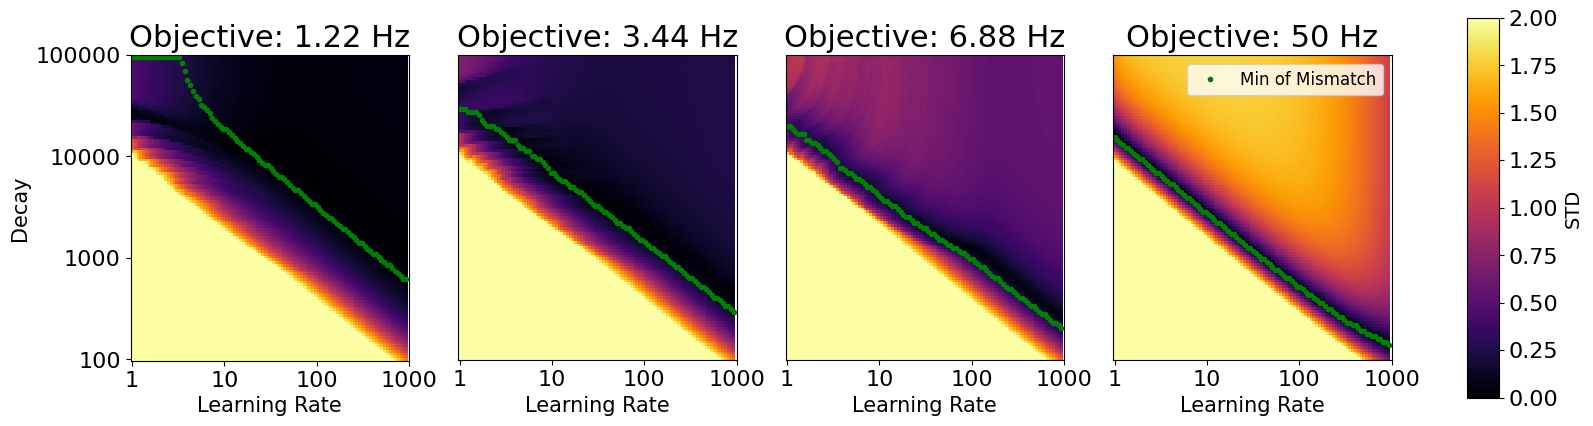

In [61]:
# Plotting STD
figname = 'FIG_2_B'
fig = plt.figure(figsize=(16, 10))
for o in range(nobjs):
    # STD over G
    ax = plt.subplot(1, nobjs, o + 1)
    im = plt.imshow(std_hom_fit[o], vmin=0, vmax=2, cmap='inferno', origin='lower', interpolation='none')
    plt.plot(range(0, nlr), min_mm_pos[o], 'g.', label='Min of Mismatch')
    
    plt.xticks(ticks=np.linspace(0, nlr, 4), labels=lr_labels, fontsize=TICKS)
    plt.xlabel('Learning Rate', fontsize=LABEL)
    plt.title('Objective: ' + str(obj_rates[o]) + ' Hz', fontsize=TITLE)
    
    if o == 0:
        plt.yticks(ticks=np.linspace(0, ndec, 4), labels=dec_labels, fontsize=TICKS)
        plt.ylabel('Decay', fontsize=LABEL)
    else:
        plt.yticks(ticks=[])

plt.legend(fontsize=LEGEND)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar

# Colorbar
cbar_ax2 = fig.add_axes([0.92, 0.31, 0.02, 0.38])  # Adjust position and size of the colorbar
cbar2 = plt.colorbar(im, cax=cbar_ax2)
cbar2.set_label('STD', fontsize=COLORBAR)
cbar2.ax.tick_params(labelsize=TICKS)  # Adjust colorbar tick font size

plt.show()

# Save the figure
fig.savefig(figfold + figname + '.png', dpi=300, bbox_inches='tight')
fig.savefig(figfold + figname + '.pdf', dpi=300, bbox_inches='tight')


## FIC vs STR grid

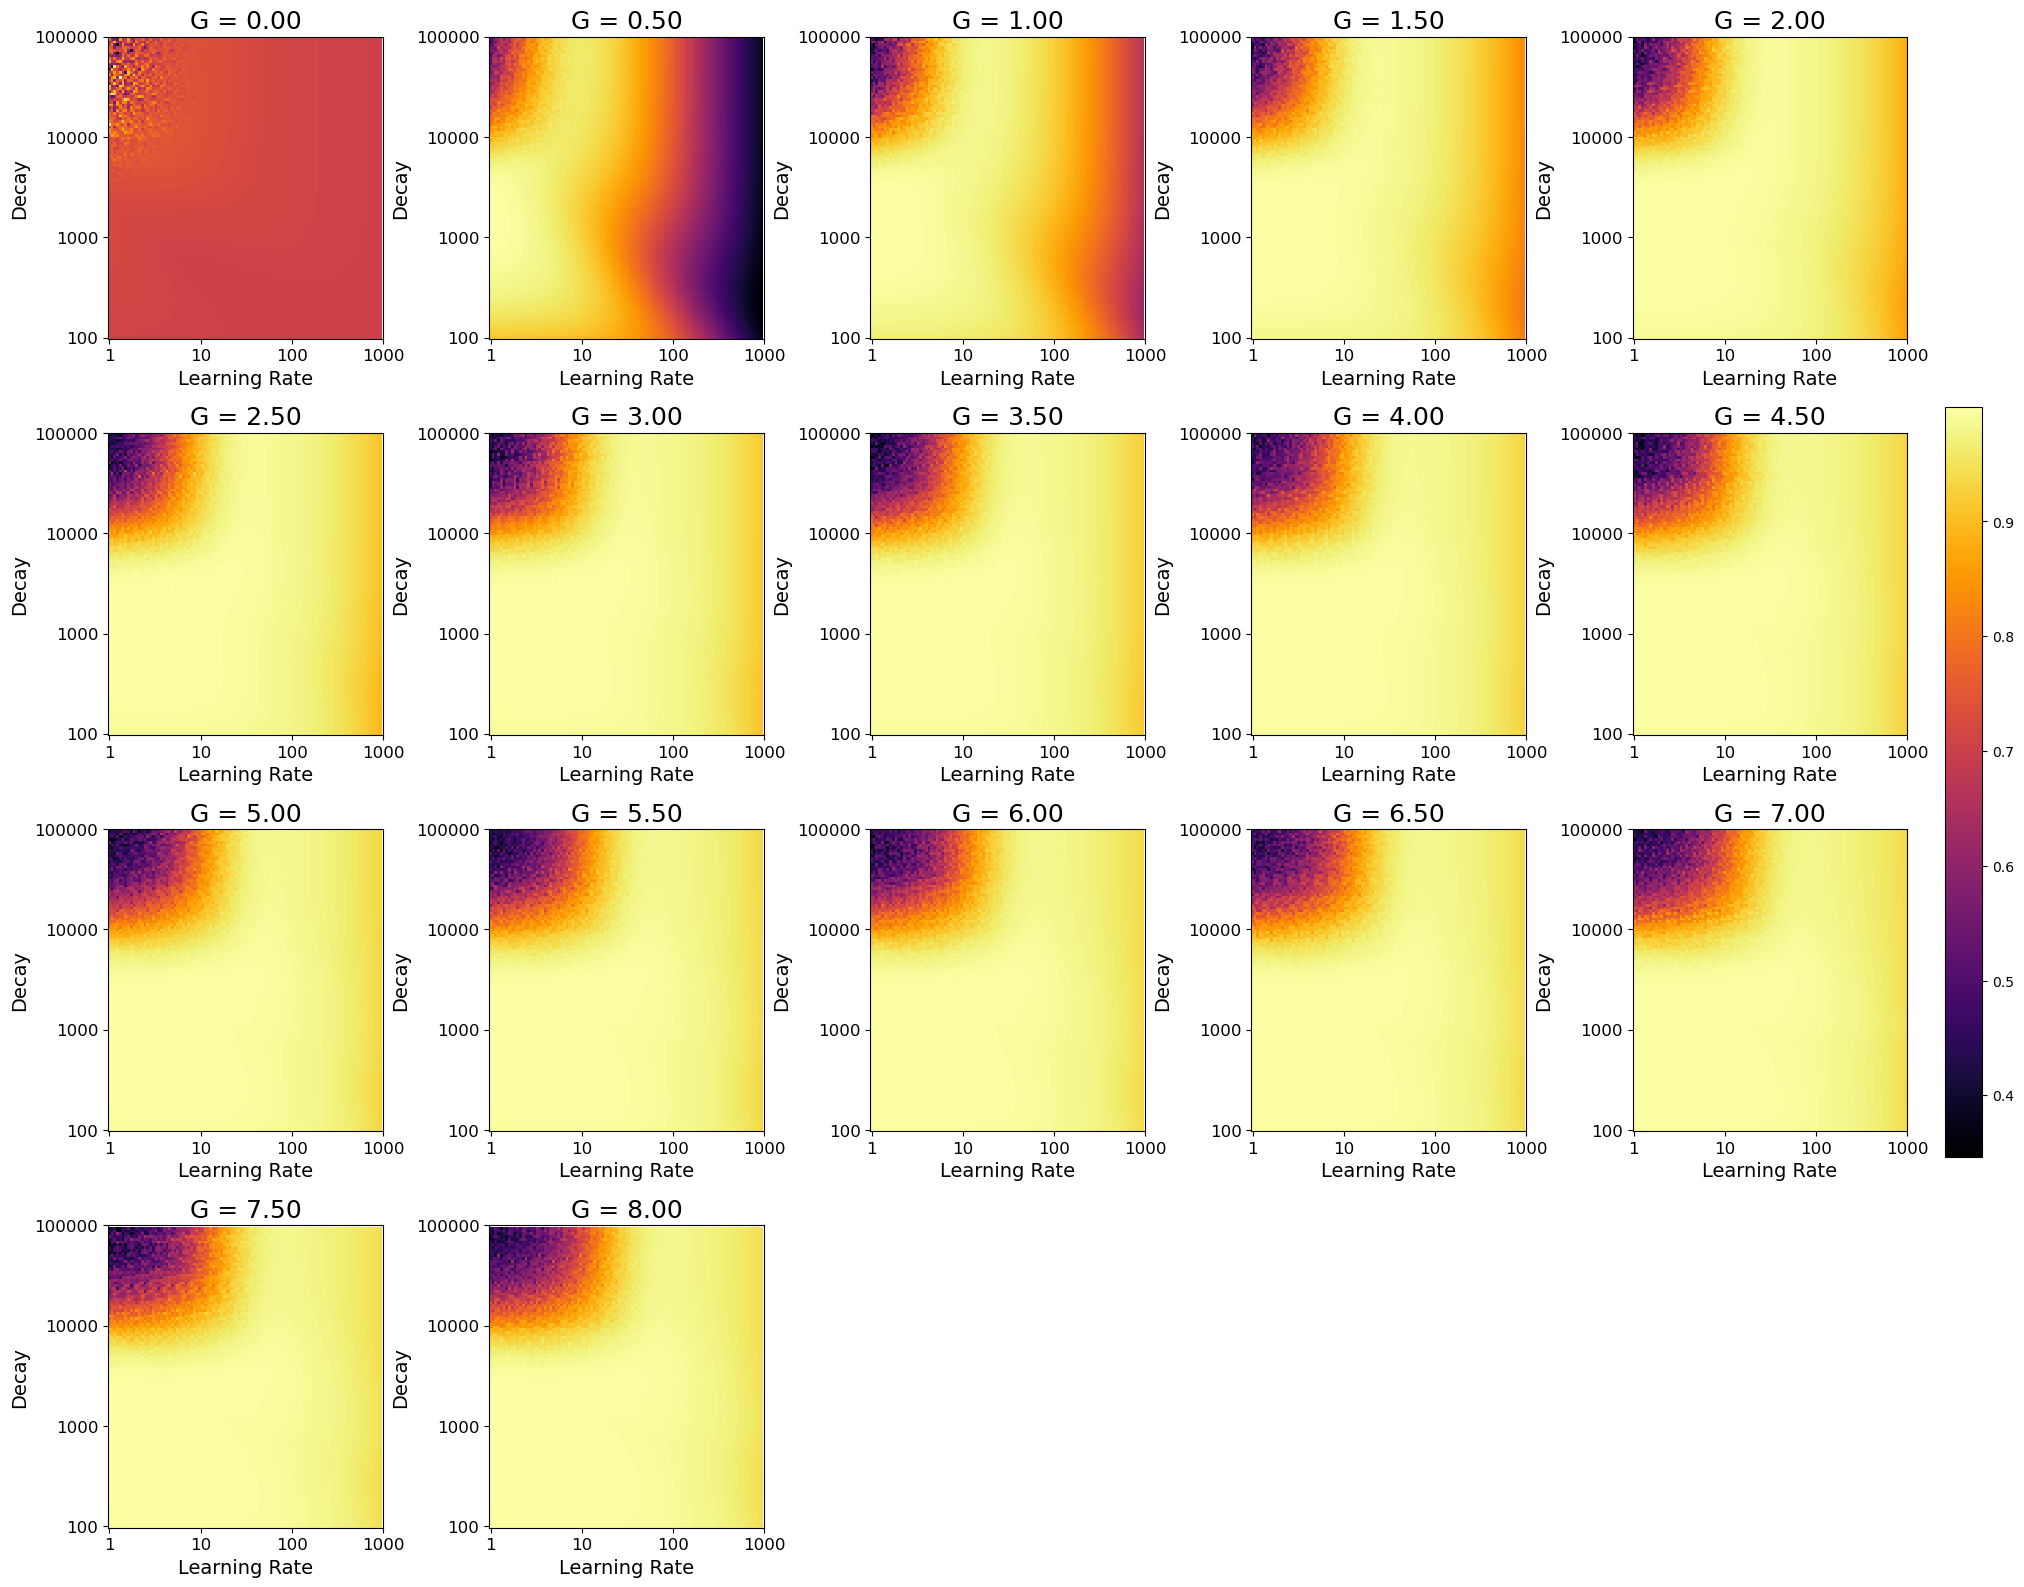

In [6]:
# Plot 17 subplots where you show a heatmap of the average accross the last dimension
figname = 'FIG_2_C'
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()
G_values = np.arange(0, 8.5, 0.5)
for i in range(17):
    ax = axes[i]
    heatmap_data = np.mean(fic_corr[:, :, :, i, :], axis=3)
    im = ax.imshow(heatmap_data, cmap='inferno', origin='lower', interpolation='none')
    ax.set_title(f'G = {G_values[i]:.2f}', fontsize=TITLE)
    ax.set_xticks(np.linspace(0, nlr, 4))
    ax.set_xticklabels(lr_labels, fontsize=TICKS)
    ax.set_xlabel('Learning Rate', fontsize=LABEL)
    ax.set_yticks(np.linspace(0, ndec, 4))
    ax.set_yticklabels(dec_labels, fontsize=TICKS)
    ax.set_ylabel('Decay', fontsize=LABEL)

# Hide any unused subplots
for j in range(17, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
plt.show()

# Save the figure
#fig.savefig(figfold + figname + '.png', dpi=300)
#fig.savefig(figfold + figname + '.pdf')

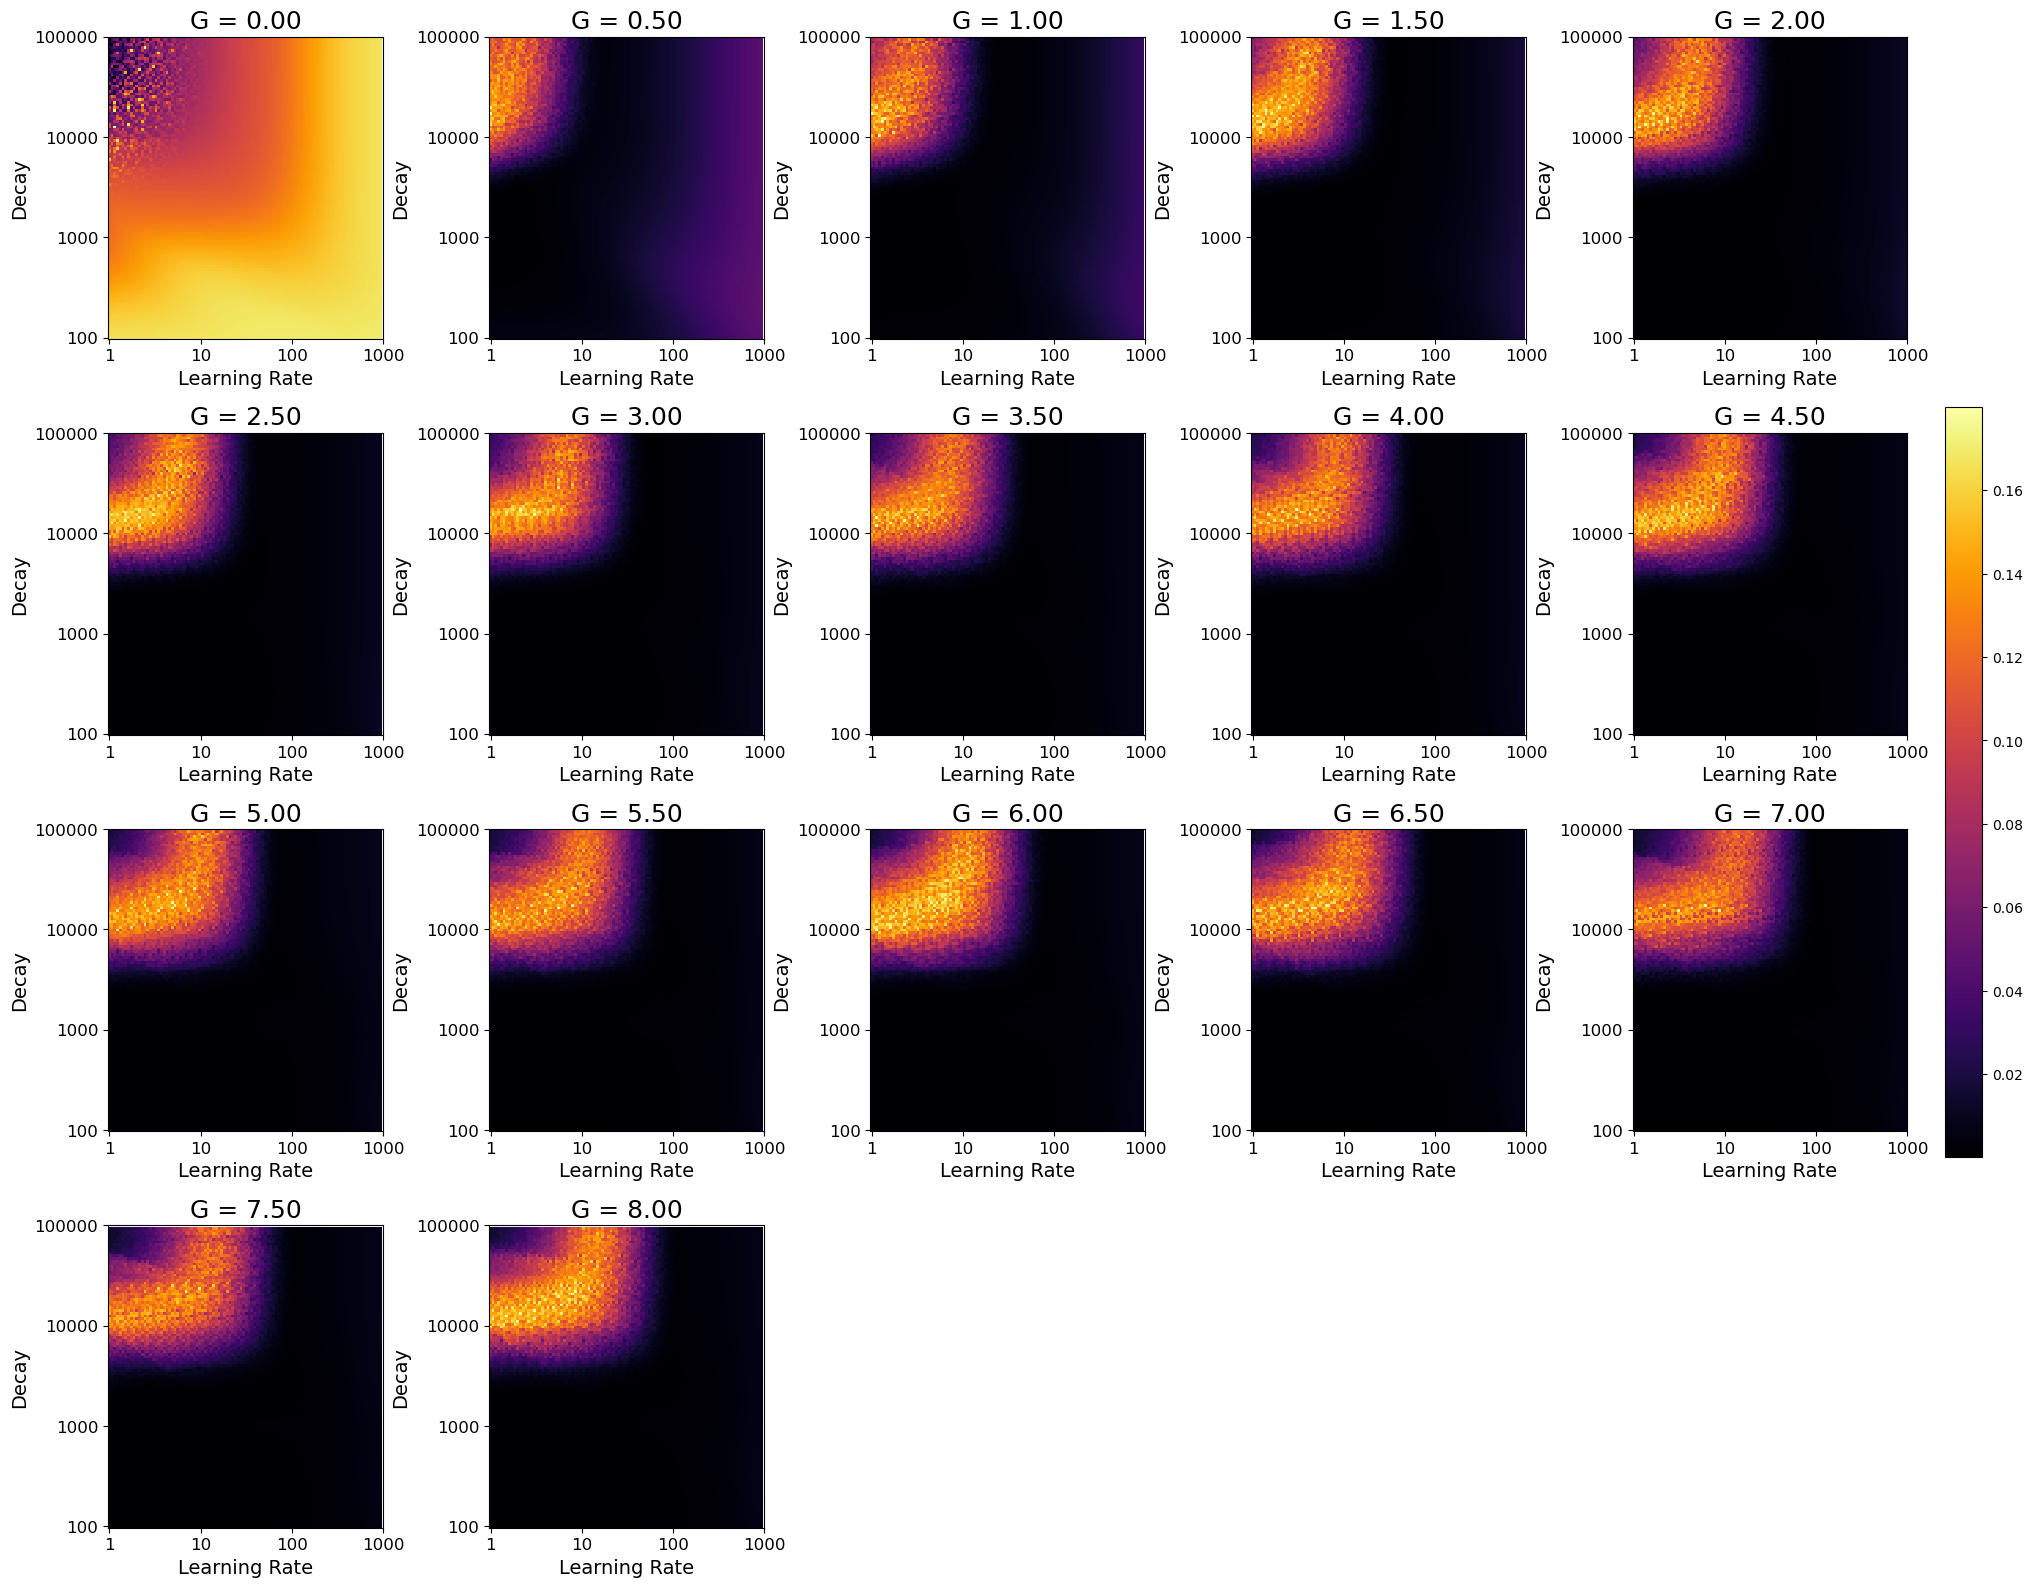

In [7]:
# Plot 17 subplots where you show a heatmap of the average accross the last dimension
figname = 'FIG_2_C'
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()
G_values = np.arange(0, 8.5, 0.5)
for i in range(17):
    ax = axes[i]
    #heatmap_data = np.mean(fic_corr[:, :, :, i, :], axis=3)
    # Create a heatmap with the index it takes to reach the maximum value
    heatmap_data = np.std(fic_corr[:, :, :, i, :], axis=3)
    im = ax.imshow(heatmap_data, cmap='inferno', origin='lower', interpolation='none')
    ax.set_title(f'G = {G_values[i]:.2f}', fontsize=TITLE)
    ax.set_xticks(np.linspace(0, nlr, 4))
    ax.set_xticklabels(lr_labels, fontsize=TICKS)
    ax.set_xlabel('Learning Rate', fontsize=LABEL)
    ax.set_yticks(np.linspace(0, ndec, 4))
    ax.set_yticklabels(dec_labels, fontsize=TICKS)
    ax.set_ylabel('Decay', fontsize=LABEL)

# Hide any unused subplots
for j in range(17, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
plt.show()

# Save the figure
#fig.savefig(figfold + figname + '.png', dpi=300)
#fig.savefig(figfold + figname + '.pdf')

#### Comparison of static vs dynamic FIC



Acá falta agregar los paneles con correlación con la strength y la MSE.

También falta agregar en el primer panel el modelo estático que usar el promedio del FIC dinámico (mixed).


Hacer los gráficos usando el promedio de varias simulaciones para asegurarse que la inestabilidad del mixed es observada para diferentes codiciones iniciales.

In [21]:
LABEL = 18
LEGEND =18
TICKS=18

In [38]:
category_colors = {
    'Static': '#FF1F5B',     # Dark orange
    'Dynamic': '#00CD6C',    # Teal
    'LowLR': '#5F9EA0',      # Slate blue / cadet blue
    'HighLR': '#A93226',     # Dark red
    'STR': '#009E73',        # Green (same as Dynamic, can adjust if needed)
    'SCORE': '#882E72'       # Purple
}

In [26]:
sns.set_style("darkgrid")

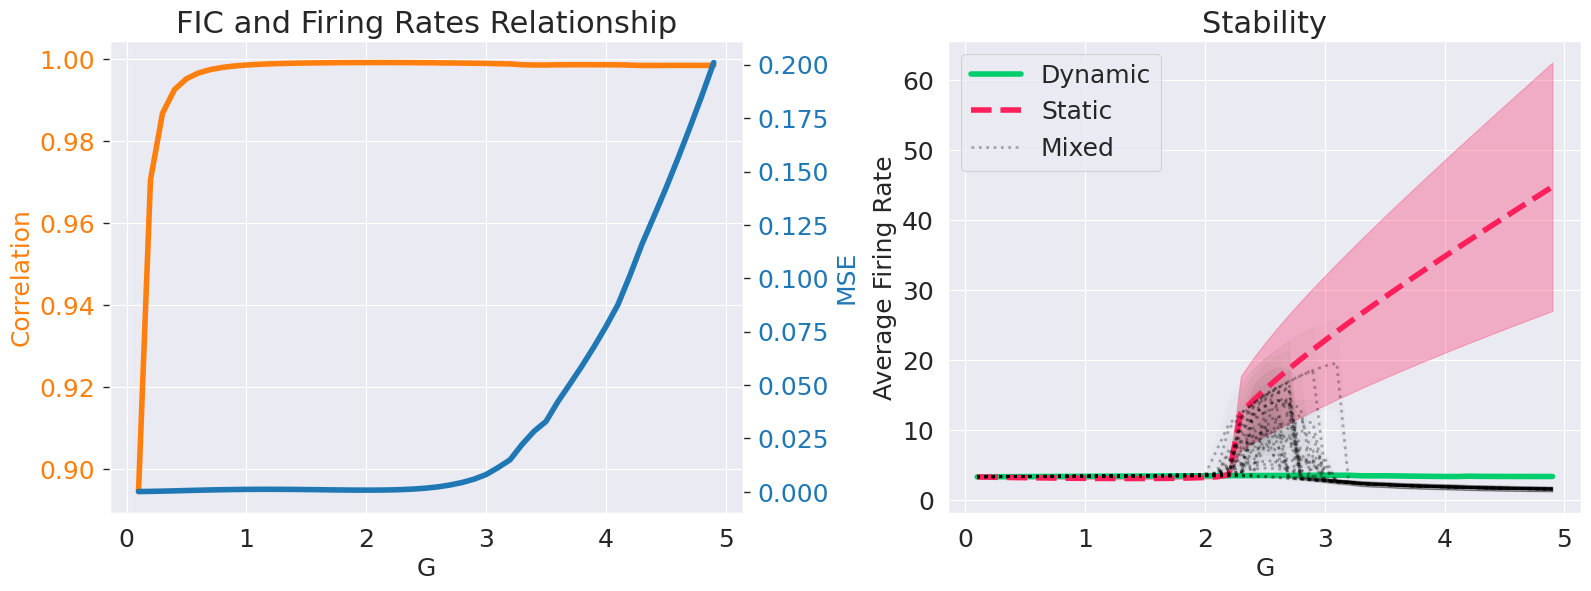

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data path
data_path = "/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar"

# Load the results from the specified directory
mse_values = np.load(os.path.join(data_path, "mse_values.npy"))
corr_values = np.load(os.path.join(data_path, "corr_values.npy"))
avg_fr_dyn_values = np.load(os.path.join(data_path, "avg_fr_dyn_values.npy"))
avg_fr_stat_values = np.load(os.path.join(data_path, "avg_fr_stat_values.npy"))
avg_fr_mixed_values = np.load(os.path.join(data_path, "avg_fr_mixed_values.npy"))
G_values = np.load(os.path.join(data_path, "G_values.npy"))

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
with sns.axes_style("darkgrid"):
    # Subplot 1: Shared y-axis plot for Correlation and MSE
    ax1 = axes[0]
    color = 'tab:orange'
    ax1.set_xlabel('G', fontsize=LABEL)
    ax1.set_ylabel('Correlation', color=color, fontsize=LABEL)
    ax1.plot(G_values, corr_values, color=color, label='Correlation', linewidth=4)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=TICKS)
    ax1.tick_params(axis='x', labelsize=TICKS)
with sns.axes_style("dark"):
    # MSE (Right y-axis)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('MSE', color=color, fontsize=LABEL)
    ax2.plot(G_values, mse_values, color=color, label='MSE',linewidth=4)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=TICKS)

ax1.set_title('FIC and Firing Rates Relationship', fontsize=TITLE)
with sns.axes_style("darkgrid"):
    # Subplot 2: Stability plot
    ax3 = axes[1]

    # Dynamic FIC: plot mean with shaded standard deviation
    mean_dyn = np.mean(avg_fr_dyn_values, axis=1)
    std_dyn = np.std(avg_fr_dyn_values, axis=1)
    ax3.plot(G_values, mean_dyn, label='Dynamic', color=category_colors['Dynamic'], linewidth=4)
    ax3.fill_between(G_values, mean_dyn - std_dyn, mean_dyn + std_dyn, color=category_colors['Dynamic'], alpha=0.3)

    # Static FIC: plot mean with shaded standard deviation (dashed line)
    mean_stat = np.mean(avg_fr_stat_values, axis=1)
    std_stat = np.std(avg_fr_stat_values, axis=1)
    ax3.plot(G_values, mean_stat, '--', label='Static', color=category_colors['Static'], linewidth=4)
    ax3.fill_between(G_values, mean_stat - std_stat, mean_stat + std_stat, color=category_colors['Static'], alpha=0.3)

    # Mixed values: plot each repetition with shaded error
    for i in range(avg_fr_mixed_values.shape[0]):
        mix_rep = np.mean(avg_fr_mixed_values[i, :, :], axis=1)
        mix_std = np.std(avg_fr_mixed_values[i, :, :], axis=1)
        ax3.plot(G_values, mix_rep, ':', label='Mixed' if i == 0 else "", color='black', linewidth=2, alpha=0.3)
        ax3.fill_between(G_values, mix_rep - mix_std, mix_rep + mix_std, color='black', alpha=0.01)

    ax3.set_xlabel('G', fontsize=LABEL)
    ax3.set_ylabel('Average Firing Rate', fontsize=LABEL)
    ax3.tick_params(axis='x', labelsize=TICKS)
    ax3.tick_params(axis='y', labelsize=TICKS)
    ax3.set_title('Stability', fontsize=TITLE)
    ax3.legend(fontsize=LEGEND)

# Adjust layout and save the figure
plt.tight_layout()
fig.savefig(figfold + 'FIG_2_C_D_combined.png', dpi=300)
fig.savefig(figfold + 'FIG_2_C_D_combined.svg', dpi=300)
plt.show()


### PET image

[get_dataset_dir] Dataset found in /home/ivan.mindlin/nilearn_data/fsaverage


(<Figure size 400x1000 with 3 Axes>, [<Axes3D: >, <Axes3D: >, <Axes: >])

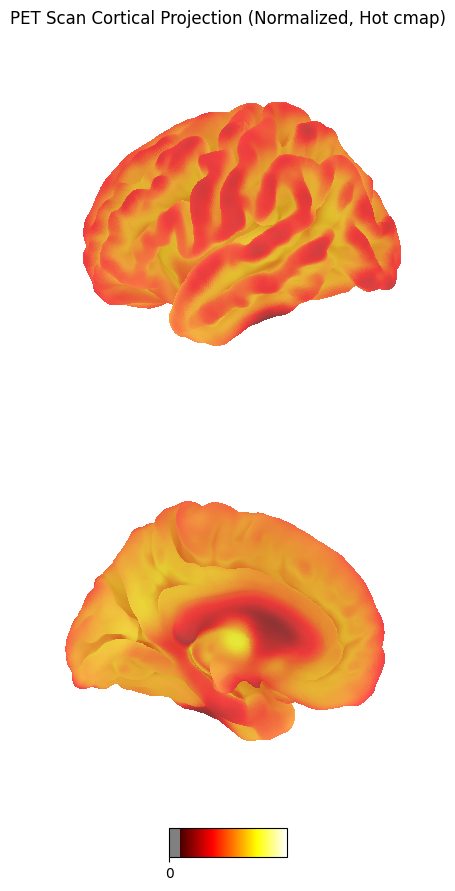

In [6]:
from nilearn import datasets, plotting, image
import numpy as np

# Load PET scan NIfTI image
pet_img = image.load_img('/mnt/data2/home/BACKUP/hansen_receptors/data/PET_nifti_images/NMDA_ge179_hc29_galovic.nii.gz')

# Normalize the PET image based on actual data min-max
data = pet_img.get_fdata()
data_norm = (data - np.min(data)) / (np.max(data) - np.min(data))

# Create a normalized Nifti image
pet_img_norm = image.new_img_like(pet_img, data_norm)

# Smooth for better visualization
pet_img_smooth = image.smooth_img(pet_img_norm, fwhm=6)

# Load fsaverage surface mesh
fsaverage = datasets.fetch_surf_fsaverage()

# Explicitly define threshold to exclude very low intensities clearly
threshold = 0.1  # Adjust if needed for clarity

# Plot with 'hot' colormap for smoother continuous gradients
plotting.plot_img_on_surf(
    pet_img_smooth,
    views=['lateral', 'medial'],
    hemispheres=['left'],  # single hemisphere
    threshold=threshold,
    cmap='hot',  # Smooth continuous gradient
    colorbar=True,
    bg_on_data=True,  # grey background for values below threshold
    vmax=1.0,        # ensures full color range usage
    surf_mesh='fsaverage',
    title='PET Scan Cortical Projection (Normalized, Hot cmap)'
)


#### Neuromodulation with and without plasticity rule

In [80]:

# Neuromodulation
nm_mean_fr = [] # 0 is static, 1 dynamic
nm_std_fr = [] # 0 is static, 1 dynamic
nm_fc = [] # 0 is static, 1 dynamic
nm_fcd = [] # 0 is static, 1 dynamic
nm_mean_fr.append(np.load(datafolder+'neuromod/staticNMDA/mean_fr_grid.npy'))
nm_mean_fr.append(np.load(datafolder+'neuromod/dynamicNMDA/mean_fr_grid.npy'))
nm_std_fr.append(np.load(datafolder+'neuromod/staticNMDA/std_fr_grid.npy'))
nm_std_fr.append(np.load(datafolder+'neuromod/dynamicNMDA/std_fr_grid.npy'))

In [81]:
## Computing the correlation between receptor density and firing rates for each learning rate
LR_range = np.logspace(0,2.46,10)
#RECEPTORS = np.load("./data/Schaeffer200-Tian/D2_fallypride_hc49_jaworska_schaeffer200.npy")[:200]
RECEPTORS = np.load("./data/Schaeffer200-Tian/NMDA_ge179_hc29_galovic_schaeffer200.npy")[:200]
#RECEPTORS = np.load("./data/Schaeffer200-Tian/5HT2a_cimbi_hc29_beliveau_schaeffer200.npy")[:200]

RECEPTORS = RECEPTORS/max(RECEPTORS)-min(RECEPTORS)
RECEPTORS = RECEPTORS - max(RECEPTORS) + 1
receptors = np.reshape(RECEPTORS, (RECEPTORS.shape[0],1))
nlrs = 10
polyfit_out_static = [np.polyfit(np.squeeze(receptors), nm_mean_fr[0][x].T, 1, full=True) for x in range(nlrs)]
polyfit_out_dyn = [np.polyfit(np.squeeze(receptors), nm_mean_fr[1][x].T, 1, full=True) for x in range(nlrs)]
corr_out_static = [1-cdist(receptors.T, nm_mean_fr[0][x],metric='correlation') for x in range(nlrs)]
corr_out_dyn = [1-cdist(receptors.T, nm_mean_fr[1][x],metric='correlation') for x in range(nlrs)]

slope_rec_fr = [np.vstack([x[0][0],y[0][0]]) for x,y in zip(polyfit_out_static,polyfit_out_dyn)]
res_rec_fr = [np.vstack([x[0][1],y[0][1]]) for x,y in zip(polyfit_out_static,polyfit_out_dyn)]
corr_rec_fr = [np.vstack([x,y]) for x,y in zip(corr_out_static,corr_out_dyn)]


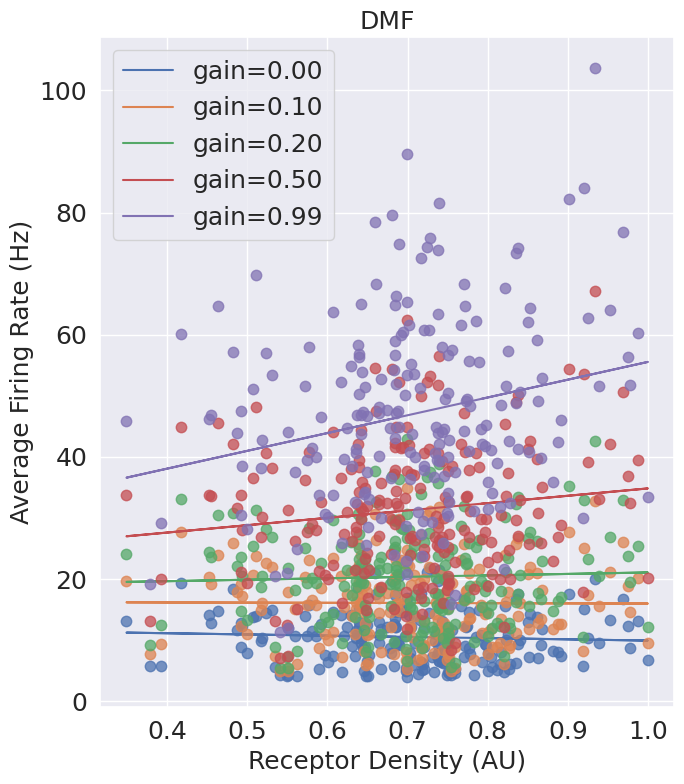

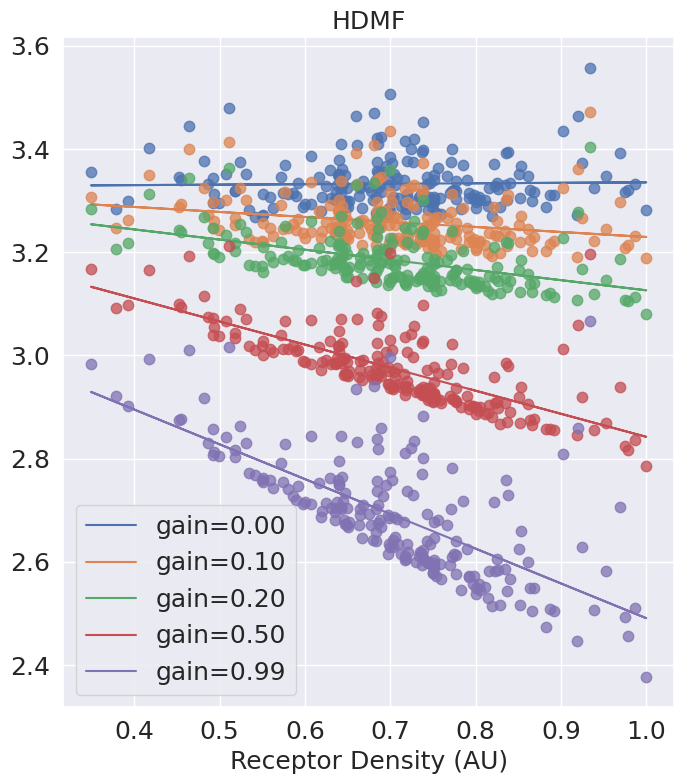

In [82]:

# Parameters
titles = ['DMF', 'HDMF']
lr_vals = np.logspace(0, 2.46, 10)
alpha_vals = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05]
receptors = RECEPTORS
gains2plot = [0, 10, 20, 50, 99]
nm_2_plot = [6, 8]
figname = 'FIG_4'

# Figure 1: DMF
fig1 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors, nm_mean_fr[0][nm_2_plot[0], g, :], '.', markersize=15, alpha=0.75)
    
    # Compute and plot the linear fit
    coeffs = np.polyfit(np.squeeze(receptors), nm_mean_fr[0][nm_2_plot[0], g, :], 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors, linear_fit(receptors), '-', color=plot.get_color(), 
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.ylabel('Average Firing Rate (Hz)', fontsize=LABEL)
plt.title(titles[0], fontsize=TITLE)
plt.xticks(fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.legend(fontsize=LEGEND)
plt.tight_layout()
plt.show()

# Save FIG_3A
fig1.savefig(figfold + figname + '_DMF.svg', dpi=300)
fig1.savefig(figfold + figname + '_DMF.pdf', dpi=300)

# Figure 2: HDMF
fig2 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors, nm_mean_fr[1][nm_2_plot[1], g, :], '.', markersize=15, alpha=0.75)
    
    # Compute and plot the linear fit
    coeffs = np.polyfit(np.squeeze(receptors), nm_mean_fr[1][nm_2_plot[1], g, :], 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors, linear_fit(receptors), '-', color=plot.get_color(), 
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.title(titles[1], fontsize=TITLE)
plt.xticks(fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.legend(fontsize=LEGEND)
plt.tight_layout()
plt.show()

# Save FIG_3B
fig2.savefig(figfold + figname + '_HDMF.svg', dpi=300)
fig2.savefig(figfold + figname + '_HDMF.pdf', dpi=300)

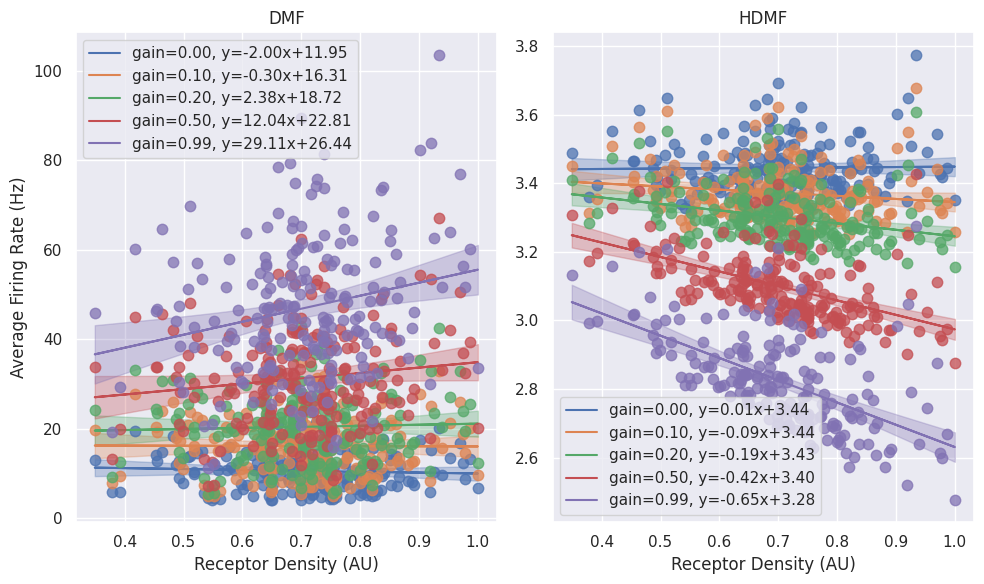

In [83]:
# FR modulation with the receptor density
import statsmodels.api as sm
titles= ['DMF','HDMF']
lr_vals = np.logspace(0,2.46,10)
alpha_vals = [0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95, 1.05]
#RECEPTORS = np.load("./data/Schaeffer200-Tian/D2_fallypride_hc49_jaworska_schaeffer200.npy")[:200]
RECEPTORS = np.load("./data/Schaeffer200-Tian/NMDA_ge179_hc29_galovic_schaeffer200.npy")[:200]
#RECEPTORS = np.load("./data/Schaeffer200-Tian/5HT2a_cimbi_hc29_beliveau_schaeffer200.npy")[:200]

RECEPTORS = RECEPTORS/max(RECEPTORS)-min(RECEPTORS)
RECEPTORS = RECEPTORS - max(RECEPTORS) + 1
receptors = np.reshape(RECEPTORS, (RECEPTORS.shape[0],1))
gains2plot = [0, 10, 20, 50, 99]

figname = 'fr_vs_neuromod_scatter'
fig = plt.figure(figsize=(10, 6))
nm_2_plot = [6,5]

for d in range(2):
    plt.subplot(1, 2, d + 1)
    for g in gains2plot:
        y_data = nm_mean_fr[d][nm_2_plot[d], g, :]
        plot, = plt.plot(receptors, y_data, '.', markersize=15, alpha=0.75)
        
        # Fit the linear regression model using statsmodels
        X = sm.add_constant(np.squeeze(receptors))  # Add an intercept to the model
        model = sm.OLS(y_data, X).fit()
        predictions = model.get_prediction(X)
        frame = predictions.summary_frame(alpha=0.05)
        
        # Plot the linear fit with the same color
        plt.plot(receptors, frame['mean'], '-', color=plot.get_color(),
                 label=f'gain={g/100:.2f}, y={model.params[1]:.2f}x+{model.params[0]:.2f}')
        
        # Plot the confidence interval
        sort_ids = np.argsort(np.squeeze(receptors))
        plt.fill_between(np.squeeze(receptors[sort_ids]).T, frame['mean_ci_lower'][sort_ids], 
                         frame['mean_ci_upper'][sort_ids], color=plot.get_color(), alpha=0.3)
        
        plt.xlabel('Receptor Density (AU)')
        plt.title(titles[d])
        if d == 0:
            plt.ylabel('Average Firing Rate (Hz)')
    plt.legend()

plt.tight_layout()
plt.show()


# fig.savefig(figfold+figname+'.png', dpi=300)
# fig.savefig(figfold+figname+'.pdf')

In [84]:
## Computing the correlation between receptor density and firing rates for each learning rate
LR_range = np.logspace(0,2.46,10)
#RECEPTORS = np.load("./data/Schaeffer200-Tian/D2_fallypride_hc49_jaworska_schaeffer200.npy")[:200]
RECEPTORS = np.load("./data/Schaeffer200-Tian/NMDA_ge179_hc29_galovic_schaeffer200.npy")[:200]
#RECEPTORS = np.load("./data/Schaeffer200-Tian/5HT2a_cimbi_hc29_beliveau_schaeffer200.npy")[:200]

RECEPTORS = RECEPTORS/max(RECEPTORS)-min(RECEPTORS)
RECEPTORS = RECEPTORS - max(RECEPTORS) + 1
receptors = np.reshape(RECEPTORS, (RECEPTORS.shape[0],1))
nlrs = 10
polyfit_out_static = [np.polyfit(np.squeeze(receptors), nm_mean_fr[0][x].T, 1, full=True) for x in range(nlrs)]
polyfit_out_dyn = [np.polyfit(np.squeeze(receptors), nm_mean_fr[1][x].T, 1, full=True) for x in range(nlrs)]
corr_out_static = [1-cdist(receptors.T, nm_mean_fr[0][x],metric='correlation') for x in range(nlrs)]
corr_out_dyn = [1-cdist(receptors.T, nm_mean_fr[1][x],metric='correlation') for x in range(nlrs)]

slope_rec_fr = [np.vstack([x[0][0],y[0][0]]) for x,y in zip(polyfit_out_static,polyfit_out_dyn)]
res_rec_fr = [np.vstack([x[0][1],y[0][1]]) for x,y in zip(polyfit_out_static,polyfit_out_dyn)]
corr_rec_fr = [np.vstack([x,y]) for x,y in zip(corr_out_static,corr_out_dyn)]


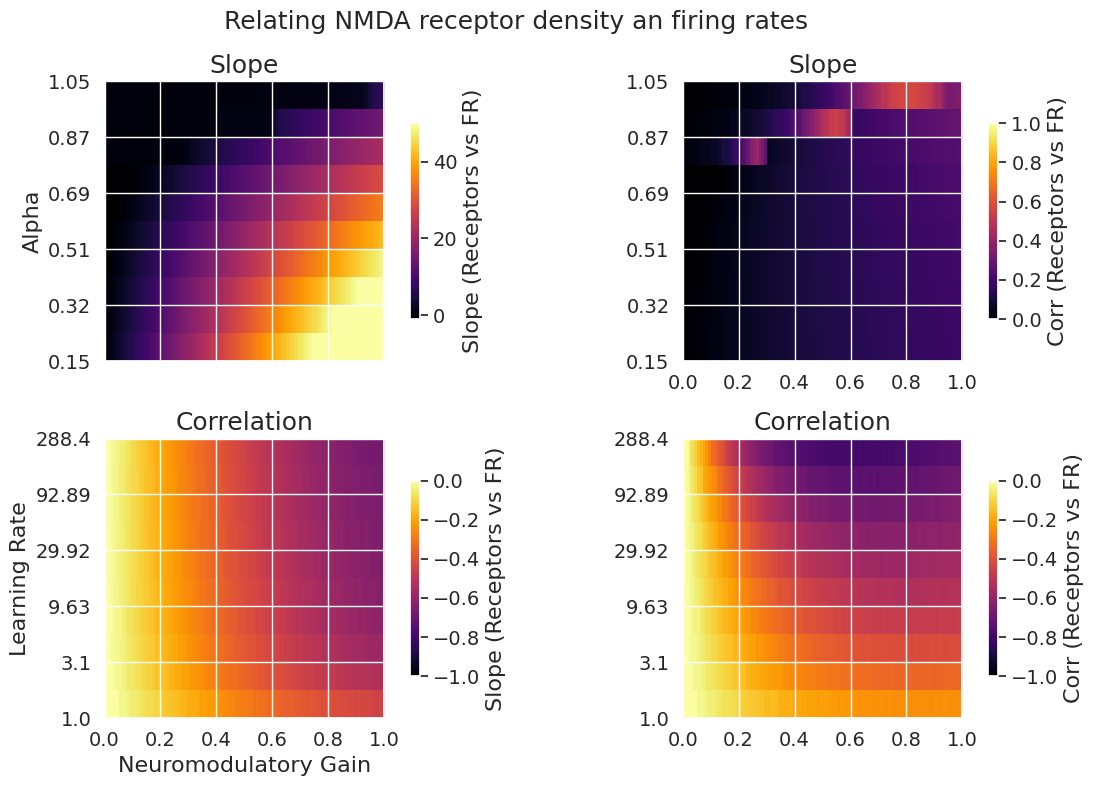

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Font sizes
TITLE = 18
LABEL = 16
TICKS = 14
COLORBAR = 16

# Parameters
figname = 'Supp_1'

titles = ['Slope', 'Correlation']
yticks = [np.floor(np.linspace(0.15, 1.05, 6) * 100) / 100, np.floor((np.logspace(0, 2.46, 6)) * 100) / 100]
ylabel = ['Alpha', 'Learning Rate']

slope_rec_fr_rs = np.dstack((slope_rec_fr))
corr_rec_fr_rs = np.dstack((corr_rec_fr))

# Display ranges
s_vmin = [-1, -1]
s_vmax = [50, 0]
c_vmin = [0, -1]
c_vmax = [1, 0]

fig = plt.figure(figsize=(12, 8))
cont = 1

for p in range(2):
    # Slope subplot
    ax1 = plt.subplot(2, 2, cont)
    im1 = ax1.imshow(slope_rec_fr_rs[p, :, :].T, origin='lower',
                     vmin=s_vmin[p], vmax=s_vmax[p], cmap='inferno',
                     interpolation='none', extent=(0, 100, 0, 100))
    ax1.set_title(titles[p], fontsize=TITLE)
    cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.7)
    cbar1.set_label('Slope (Receptors vs FR)', fontsize=COLORBAR)
    cbar1.ax.tick_params(labelsize=TICKS)
    ax1.set_yticks(np.linspace(0, 100, 6))
    ax1.set_yticklabels(yticks[p], fontsize=TICKS)
    ax1.set_ylabel(ylabel[p], fontsize=LABEL)
    #ax1.set_xticks(ticks=np.linspace(0,100,6), labels=np.linspace(0,100,6)/100)
    ax1.set_xticks(np.linspace(0, 100, 6))
    ax1.set_xticklabels(np.linspace(0, 100, 6)/100, fontsize=TICKS)
    if p==1:
        ax1.set_xlabel('Neuromodulatory Gain', fontsize=LABEL)
    else:
        ax1.set_xticklabels([])

    # Correlation subplot
    ax2 = plt.subplot(2, 2, cont + 1)
    im2 = ax2.imshow(corr_rec_fr_rs[p, :, :].T, origin='lower',
                     vmin=c_vmin[p], vmax=c_vmax[p], cmap='inferno',
                     interpolation='none', extent=(0, 100, 0, 100))
    ax2.set_title(titles[p], fontsize=TITLE)
    cbar2 = plt.colorbar(im2, ax=ax2, shrink=0.7)
    cbar2.set_label('Corr (Receptors vs FR)', fontsize=COLORBAR)
    cbar2.ax.tick_params(labelsize=TICKS)
    ax2.set_yticks(np.linspace(0, 100, 6))
    ax2.set_yticklabels(yticks[p], fontsize=TICKS)
    ax2.set_xticks(np.linspace(0, 100, 6))
    ax2.set_xticklabels(np.linspace(0, 100, 6)/100, fontsize=TICKS)
    if p==1:
        ax1.set_xlabel('Neuromodulatory Gain', fontsize=LABEL)
    else:
        ax1.set_xticklabels([])

    cont = 3  # For the next row
fig.suptitle("Relating NMDA receptor density an firing rates", fontsize=TITLE)
plt.tight_layout()
fig.savefig(figfold + figname + '.png', dpi=300)
fig.savefig(figfold + figname + '.svg', dpi=300)
plt.show()


## Supp fig 2

In [86]:

# Neuromodulation
nm_mean_fr = [] # 0 is static, 1 dynamic
nm_std_fr = [] # 0 is static, 1 dynamic
nm_fc = [] # 0 is static, 1 dynamic
nm_fcd = [] # 0 is static, 1 dynamic
nm_mean_fr.append(np.load(datafolder+'neuromod/static5HT2a/mean_fr_grid.npy'))
nm_mean_fr.append(np.load(datafolder+'neuromod/dynamic5HT2a/mean_fr_grid.npy'))
nm_std_fr.append(np.load(datafolder+'neuromod/static5HT2a/std_fr_grid.npy'))
nm_std_fr.append(np.load(datafolder+'neuromod/dynamic5HT2a/std_fr_grid.npy'))

In [87]:
## Computing the correlation between receptor density and firing rates for each learning rate
LR_range = np.logspace(0,2.46,10)
#RECEPTORS = np.load("./data/Schaeffer200-Tian/D2_fallypride_hc49_jaworska_schaeffer200.npy")[:200]
#RECEPTORS = np.load("./data/Schaeffer200-Tian/NMDA_ge179_hc29_galovic_schaeffer200.npy")[:200]
RECEPTORS = np.load("./data/Schaeffer200-Tian/5HT2a_cimbi_hc29_beliveau_schaeffer200.npy")[:200]

RECEPTORS = RECEPTORS/max(RECEPTORS)-min(RECEPTORS)
RECEPTORS = RECEPTORS - max(RECEPTORS) + 1
receptors = np.reshape(RECEPTORS, (RECEPTORS.shape[0],1))
nlrs = 10
polyfit_out_static = [np.polyfit(np.squeeze(receptors), nm_mean_fr[0][x].T, 1, full=True) for x in range(nlrs)]
polyfit_out_dyn = [np.polyfit(np.squeeze(receptors), nm_mean_fr[1][x].T, 1, full=True) for x in range(nlrs)]
corr_out_static = [1-cdist(receptors.T, nm_mean_fr[0][x],metric='correlation') for x in range(nlrs)]
corr_out_dyn = [1-cdist(receptors.T, nm_mean_fr[1][x],metric='correlation') for x in range(nlrs)]

slope_rec_fr = [np.vstack([x[0][0],y[0][0]]) for x,y in zip(polyfit_out_static,polyfit_out_dyn)]
res_rec_fr = [np.vstack([x[0][1],y[0][1]]) for x,y in zip(polyfit_out_static,polyfit_out_dyn)]
corr_rec_fr = [np.vstack([x,y]) for x,y in zip(corr_out_static,corr_out_dyn)]


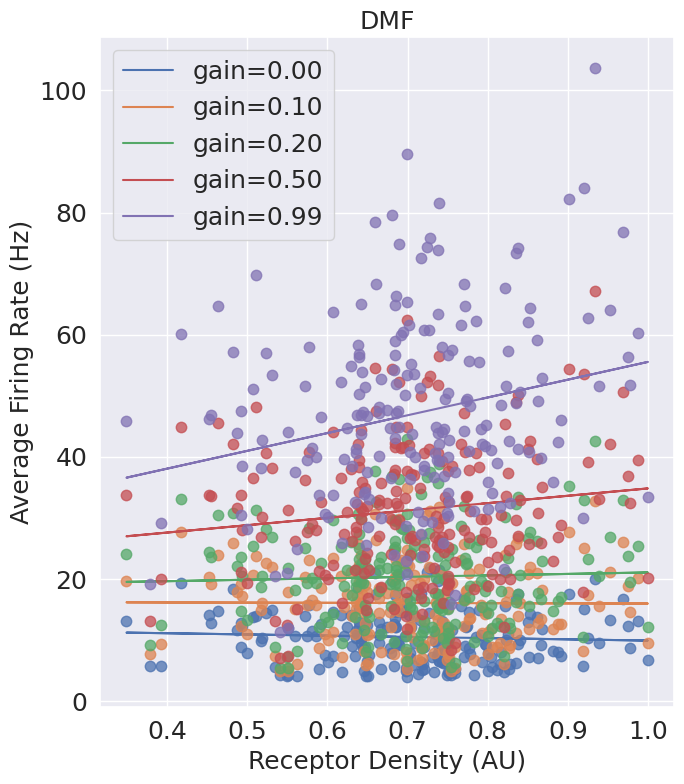

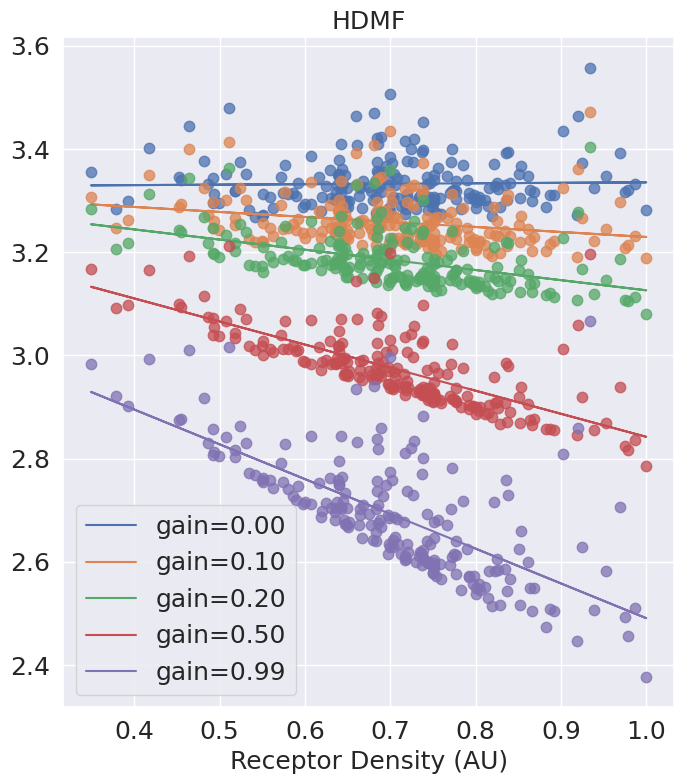

In [ ]:

# Parameters
titles = ['DMF', 'HDMF']
lr_vals = np.logspace(0, 2.46, 10)
alpha_vals = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05]
receptors = RECEPTORS
gains2plot = [0, 10, 20, 50, 99]
nm_2_plot = [6, 8]
figname = 'Supp_Fig_2'

# Figure 1: DMF
fig1 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors, nm_mean_fr[0][nm_2_plot[0], g, :], '.', markersize=15, alpha=0.75)
    
    # Compute and plot the linear fit
    coeffs = np.polyfit(np.squeeze(receptors), nm_mean_fr[0][nm_2_plot[0], g, :], 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors, linear_fit(receptors), '-', color=plot.get_color(), 
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.ylabel('Average Firing Rate (Hz)', fontsize=LABEL)
plt.title(titles[0], fontsize=TITLE)
plt.xticks(fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.legend(fontsize=LEGEND)
plt.tight_layout()
plt.show()

# Save FIG_3A
fig1.savefig(figfold + figname + '_DMF.svg', dpi=300)
fig1.savefig(figfold + figname + '_DMF.pdf', dpi=300)

# Figure 2: HDMF
fig2 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors, nm_mean_fr[1][nm_2_plot[1], g, :], '.', markersize=15, alpha=0.75)
    
    # Compute and plot the linear fit
    coeffs = np.polyfit(np.squeeze(receptors), nm_mean_fr[1][nm_2_plot[1], g, :], 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors, linear_fit(receptors), '-', color=plot.get_color(), 
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.title(titles[1], fontsize=TITLE)
plt.xticks(fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.legend(fontsize=LEGEND)
plt.tight_layout()
plt.show()

# Save FIG_3B
fig2.savefig(figfold + figname + '_HDMF.svg', dpi=300)
fig2.savefig(figfold + figname + '_HDMF.pdf', dpi=300)

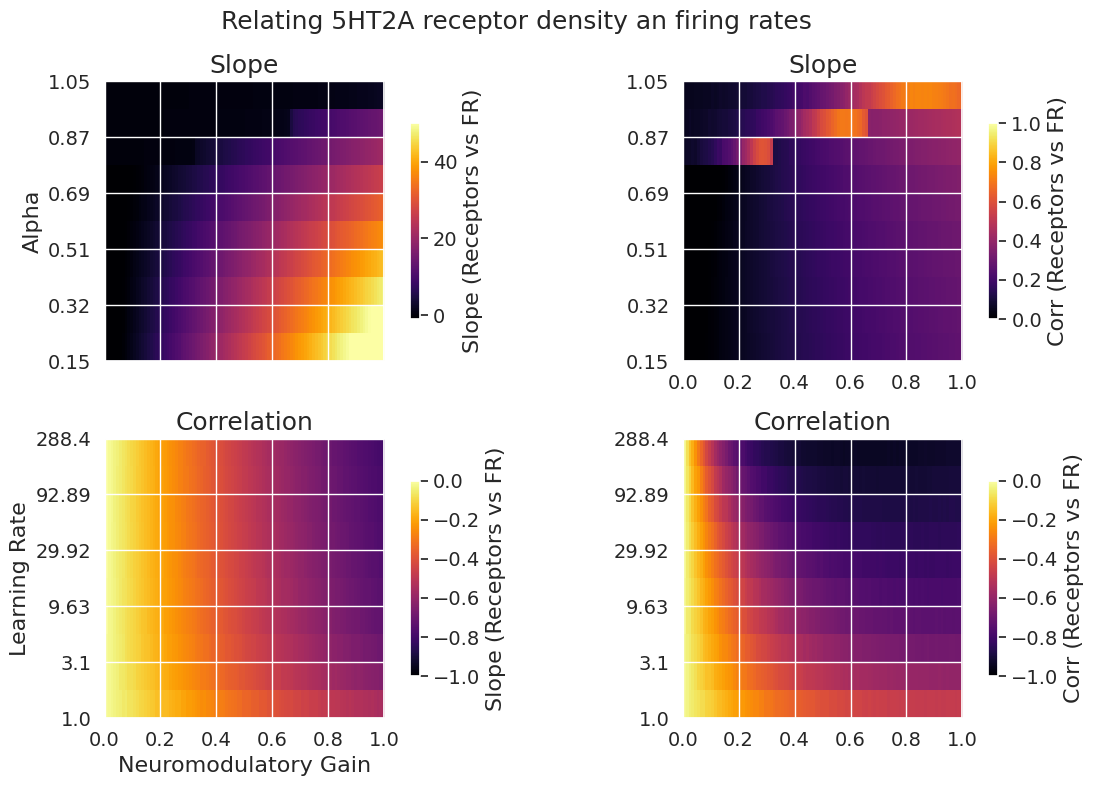

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Font sizes
TITLE = 18
LABEL = 16
TICKS = 14
COLORBAR = 16

# Parameters
figname = 'Supp_2'

titles = ['Slope', 'Correlation']
yticks = [np.floor(np.linspace(0.15, 1.05, 6) * 100) / 100, np.floor((np.logspace(0, 2.46, 6)) * 100) / 100]
ylabel = ['Alpha', 'Learning Rate']

slope_rec_fr_rs = np.dstack((slope_rec_fr))
corr_rec_fr_rs = np.dstack((corr_rec_fr))

# Display ranges
s_vmin = [-1, -1]
s_vmax = [50, 0]
c_vmin = [0, -1]
c_vmax = [1, 0]

fig = plt.figure(figsize=(12, 8))
cont = 1

for p in range(2):
    # Slope subplot
    ax1 = plt.subplot(2, 2, cont)
    im1 = ax1.imshow(slope_rec_fr_rs[p, :, :].T, origin='lower',
                     vmin=s_vmin[p], vmax=s_vmax[p], cmap='inferno',
                     interpolation='none', extent=(0, 100, 0, 100))
    ax1.set_title(titles[p], fontsize=TITLE)
    cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.7)
    cbar1.set_label('Slope (Receptors vs FR)', fontsize=COLORBAR)
    cbar1.ax.tick_params(labelsize=TICKS)
    ax1.set_yticks(np.linspace(0, 100, 6))
    ax1.set_yticklabels(yticks[p], fontsize=TICKS)
    ax1.set_ylabel(ylabel[p], fontsize=LABEL)
    #ax1.set_xticks(ticks=np.linspace(0,100,6), labels=np.linspace(0,100,6)/100)
    ax1.set_xticks(np.linspace(0, 100, 6))
    ax1.set_xticklabels(np.linspace(0, 100, 6)/100, fontsize=TICKS)
    if p==1:
        ax1.set_xlabel('Neuromodulatory Gain', fontsize=LABEL)
    else:
        ax1.set_xticklabels([])

    # Correlation subplot
    ax2 = plt.subplot(2, 2, cont + 1)
    im2 = ax2.imshow(corr_rec_fr_rs[p, :, :].T, origin='lower',
                     vmin=c_vmin[p], vmax=c_vmax[p], cmap='inferno',
                     interpolation='none', extent=(0, 100, 0, 100))
    ax2.set_title(titles[p], fontsize=TITLE)
    cbar2 = plt.colorbar(im2, ax=ax2, shrink=0.7)
    cbar2.set_label('Corr (Receptors vs FR)', fontsize=COLORBAR)
    cbar2.ax.tick_params(labelsize=TICKS)
    ax2.set_yticks(np.linspace(0, 100, 6))
    ax2.set_yticklabels(yticks[p], fontsize=TICKS)
    ax2.set_xticks(np.linspace(0, 100, 6))
    ax2.set_xticklabels(np.linspace(0, 100, 6)/100, fontsize=TICKS)
    if p==1:
        ax1.set_xlabel('Neuromodulatory Gain', fontsize=LABEL)
    else:
        ax1.set_xticklabels([])

    cont = 3  # For the next row
fig.suptitle("Relating 5HT2A receptor density an firing rates", fontsize=TITLE)
plt.tight_layout()
fig.savefig(figfold + figname + '.png', dpi=300)
fig.savefig(figfold + figname + '.svg', dpi=300)
plt.show()


# Fig 3

In [29]:
import fastdyn_fic_dmf as dmf

def compute_fcd(data, wsize, overlap, isubdiag, params):
    T, N = data.shape
    win_start = np.arange(0, T - params["wsize"] - 1, params["wsize"] - overlap)
    nwins = len(win_start)
    fcd = np.zeros((len(isubdiag[0]), nwins))
    for i in range(nwins):
        tmp = data[win_start[i]:win_start[i] + params["wsize"] + 1, :]
        cormat = np.corrcoef(tmp.T)
        fcd[:, i] = cormat[isubdiag[0], isubdiag[1]]
    return fcd

C = loadmat('./data/DTI_fiber_consensus_HCP.mat')['connectivity'][:200, :200]
C = 0.2 * C / np.max(C)
params = dmf.default_params(C=C)
params['N'] = C.shape[0]
isubfcd = np.triu_indices(C.shape[1], 1)
burnout = 7
params["wsize"] = 30
overlap = 29
params['TR'] = 2
T = 250
params['dtt'] = 0.001  # Assuming 'dtt' is defined; adjust as needed
nb_steps = int(T * params['TR'] / params['dtt'])
win_start = np.arange(0, T - burnout - params["wsize"], params["wsize"] - overlap)
nwins = len(win_start)
nints = len(isubfcd[0])

emp_data = mat73.loadmat('data/BOLD_timeseries_Awake.mat')
emp_data = np.squeeze(np.array(emp_data['BOLD_timeseries_Awake']))[:,:200,:]
emp_data = emp_data[:,:,burnout:]


emp_fcds = []
for sub in range(emp_data.shape[0]):
    fcds = compute_fcd(emp_data[sub, :, :].T, params["wsize"], overlap, isubfcd, params)
    upp_tr_fcd = np.corrcoef(fcds.T)[np.triu_indices(nwins-1, 1)]
    emp_fcds.append(upp_tr_fcd)

emp_fc = np.mean(np.array([np.corrcoef(emp_data[sub, :, :]) for sub in range(emp_data.shape[0])]), axis=0)
# remove the diagonal
emp_fc = emp_fc - np.eye(emp_fc.shape[0])

emp_fcd = np.hstack((emp_fcds))


In [30]:
# load ~/Desktop/DatosParaRuben/FittedSimulations/fcs_grid.npy

fcs_grid = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/FittedSimulations/fcs_grid.npy')
fcds_grid = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/FittedSimulations/fcds_grid.npy')

In [31]:
# ------------------------------------------------------------------
# PRE‑COMPUTED GRIDS
#   fcs_grid  : (2, nRep, N, N)
#   fcds_grid : (2, nRep, nWins, nWins)        # square, NOT flattened
# ------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

triu_fc  = np.triu_indices(fcs_grid.shape[2], k=1)
n_rep    = fcs_grid.shape[1]

rep_corr = np.zeros((2, n_rep))
rep_ks   = np.zeros((2, n_rep))

sim_fcd_stat_vals = []        # 1‑D vectors collected here
sim_fcd_dyn_vals  = []

for m, label in enumerate(("Static", "Dynamic")):          # m = 0/1
    for r in range(n_rep):
        # ---------- FC correlation ----------
        sim_fc      = fcs_grid[m, r]
        rep_corr[m, r] = pearsonr(sim_fc[triu_fc], emp_fc[triu_fc])[0]

        # ---------- FCD distribution ----------
        sim_fcd_mat = fcds_grid[m, r]          # square (nWins × nWins)
        triu_FCD    = np.triu_indices(sim_fcd_mat.shape[0]-1, k=1)
        sim_fcd_vals = sim_fcd_mat[triu_FCD]

        # Two‑sample KS distance against the empirical pool
        rep_ks[m, r] = ks_2samp(sim_fcd_vals, emp_fcd)[0]

        # Collect for the histogram (ONE flat vector!)
        if m == 0:
            sim_fcd_stat_vals.append(sim_fcd_vals)
        else:
            sim_fcd_dyn_vals.append(sim_fcd_vals)

# concatenate across repetitions so seaborn sees three 1‑D vectors
sim_fcd_stat = np.hstack(sim_fcd_stat_vals)
sim_fcd_dyn  = np.hstack(sim_fcd_dyn_vals)


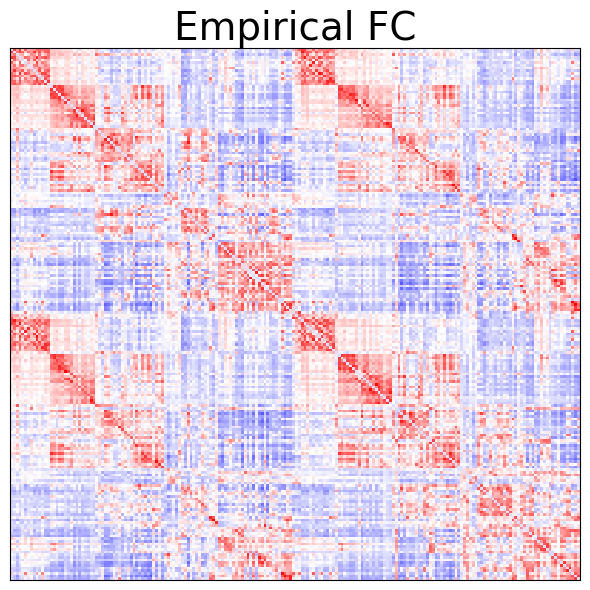

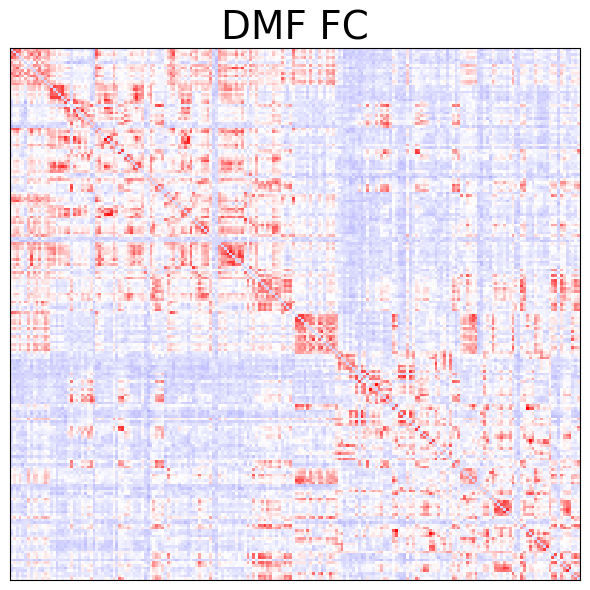

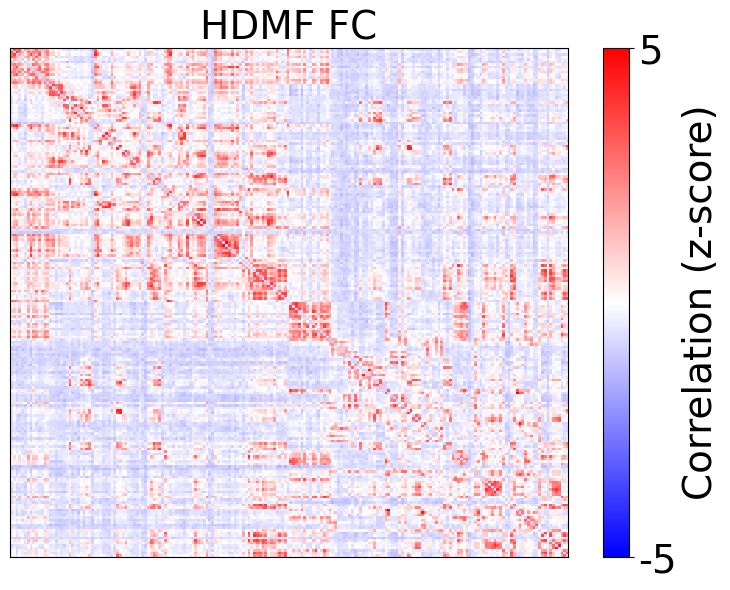

In [36]:


# Font sizes
from tkinter import font


TITLE = 28
LABEL = 18
TICKS = 18
COLORBAR = 18

# Parameters
figname_base = 'FIG_3_'

fc_color_palette = 'bwr' #sns.diverging_palette(145, 300, s=60, as_cmap=True)
# Plot A: Empirical FC
fig_a = plt.figure(figsize=(6, 6))
# put 0 on the diagonal

# z-score the fc excluding the diagonal
emp_fc = (emp_fc - np.mean(emp_fc[triu_fc])) / np.std(emp_fc[triu_fc])
lim= np.max(np.abs(emp_fc))
plt.imshow(emp_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)


plt.title('Empirical FC', fontsize=TITLE)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_a.savefig(figfold + figname_base + 'A.png', dpi=300)
fig_a.savefig(figfold + figname_base + 'A.svg', dpi=300)
plt.show()

# Plot B: DMF FC
fig_b = plt.figure(figsize=(6, 6))
ave_static_fc = np.mean(fcs_grid[0, :16, :, :], axis=0)
# remove the diagonal
ave_static_fc = ave_static_fc - np.eye(ave_static_fc.shape[0])
# z-score the fc excluding the diagonal
ave_static_fc = (ave_static_fc - np.mean(ave_static_fc[triu_fc])) / np.std(ave_static_fc[triu_fc])
lim = np.max(np.abs(ave_static_fc))
plt.imshow(ave_static_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)
plt.title('DMF FC', fontsize=TITLE)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_b.savefig(figfold + figname_base + 'B.png', dpi=300)
fig_b.savefig(figfold + figname_base + 'B.svg', dpi=300)
plt.show()

# Plot C: HDMF FC
fig_c = plt.figure(figsize=(7.55, 6))
ave_dynamic_fc = np.mean(fcs_grid[1, :16, :, :], axis=0)
ave_dynamic_fc = ave_dynamic_fc - np.eye(ave_dynamic_fc.shape[0]) 
# z-score the fc excluding the diagonal
ave_dynamic_fc = (ave_dynamic_fc - np.mean(ave_dynamic_fc[triu_fc])) / np.std(ave_dynamic_fc[triu_fc])
lim = np.max(np.abs(ave_dynamic_fc))
h = plt.imshow(ave_dynamic_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)
cbar = plt.colorbar(h)
# Put -1 and 1 in the colorbar
cbar.set_ticks([-lim, lim])
cbar.set_ticklabels(['-5', '5'], fontsize=TITLE)
cbar.set_label('Correlation (z-score)', fontsize=TITLE)
plt.title('HDMF FC', fontsize=TITLE)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_c.savefig(figfold + figname_base + 'C.png', dpi=300)
fig_c.savefig(figfold + figname_base + 'C.svg', dpi=300)
plt.show()



In [33]:
lim

5.490564006895907

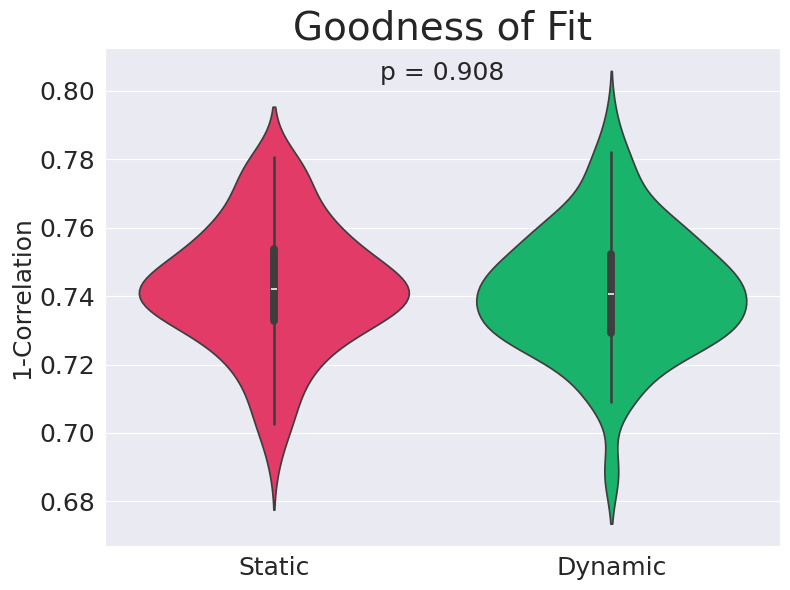

In [39]:
# Plot D: Violin Plot for Goodness of Fit
# Compute goodness of fit as 1 - rep_corr for each repetition
sns.set_style("darkgrid")
gof = 1 - rep_corr.T  # shape: (repetitions, 2)

fig_d = plt.figure(figsize=(8, 6))
sns.violinplot(data=gof, palette=[category_colors['Static'], category_colors['Dynamic']])
plt.xticks(ticks=[0, 1], labels=['Static', 'Dynamic'], fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.ylabel('1-Correlation', fontsize=LABEL)
plt.title('Goodness of Fit', fontsize=TITLE)

# Perform KS two-sample test on the goodness of fit distributions
stat, p_value = ks_2samp(gof[:, 0], gof[:, 1])
if p_value < 0.05:
    if p_value < 0.001:
        annotation = '***'
    elif p_value < 0.01:
        annotation = '**'
    else:
        annotation = '*'
else:
    annotation = f"p = {p_value:.3f}"
    
plt.text(0.5, 0.95, annotation,
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=LABEL)

plt.tight_layout()
#fig_d.savefig(figfold + figname_base + 'D.png', dpi=300)
#fig_d.savefig(figfold + figname_base + 'D.svg', dpi=300)
plt.show()


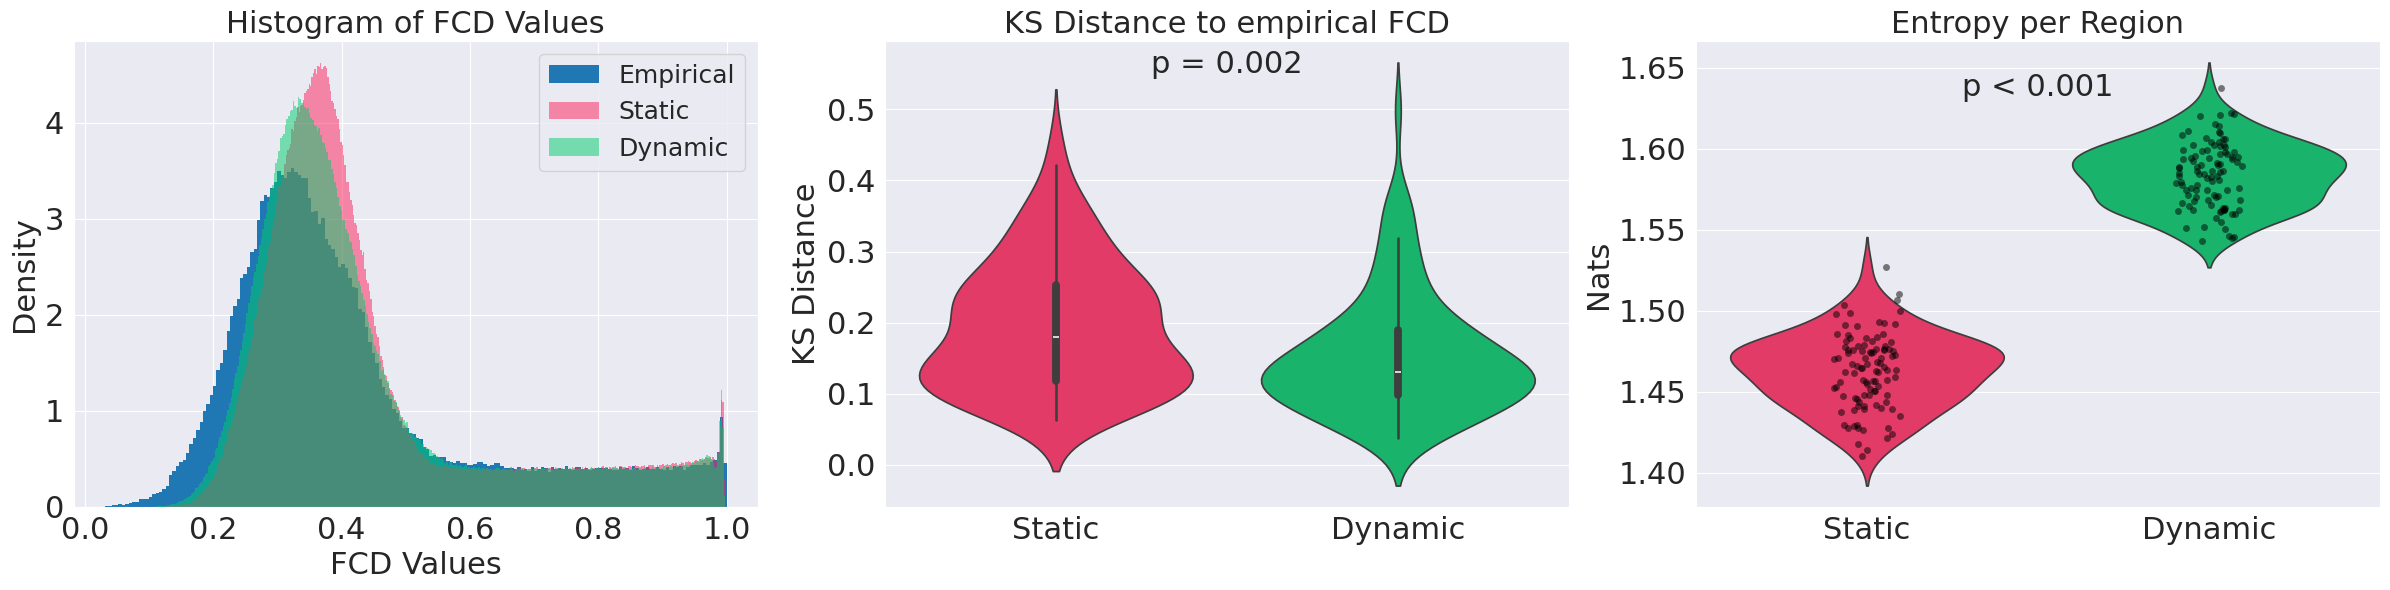

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import numpy as np

# Font sizes
TITLE = 22
LABEL = 22
TICKS = 22
LEGEND = 18

# Parameters
figname_base = 'FIG_3_'
col_pal = sns.color_palette()

# Use the assigned colors for Static and Dynamic
static_color = category_colors['Static']
dynamic_color = category_colors['Dynamic']

# Create a figure with 3 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot A: Histogram of FCD Values
sns.histplot(emp_fcd, stat='density', legend=False, linewidth=0, label='Empirical', alpha=1, color=col_pal[0], ax=axes[0])
sns.histplot(sim_fcd_stat, stat='density', legend=False, linewidth=0, label='Static', alpha=0.5, color=static_color, ax=axes[0])
sns.histplot(sim_fcd_dyn, stat='density', legend=False, linewidth=0, label='Dynamic', alpha=0.5, color=dynamic_color, ax=axes[0])
axes[0].set_xlabel('FCD Values', fontsize=LABEL)
axes[0].set_ylabel('Density', fontsize=LABEL)
axes[0].set_title('Histogram of FCD Values', fontsize=TITLE)
axes[0].tick_params(axis='both', labelsize=TICKS)
axes[0].legend(fontsize=LEGEND)

# Plot B: Violin Plot of KS Distance
sns.violinplot(data=rep_ks.T, palette=[static_color, dynamic_color], ax=axes[1])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Static', 'Dynamic'], fontsize=TICKS)
axes[1].set_ylabel('KS Distance', fontsize=LABEL)
axes[1].set_title('KS Distance to empirical FCD', fontsize=TITLE)
axes[1].tick_params(axis='y', labelsize=TICKS)

# Perform KS two-sample test on the KS distance distributions
stat, p_value = ks_2samp(rep_ks[0, :], rep_ks[1, :])
if p_value < 0.05:
    annotation = "p = {:.3f}".format(p_value)

# Annotate the plot (using axis relative coordinates)
axes[1].text(0.5, 0.95, annotation,
             horizontalalignment='center', verticalalignment='center',
             transform=axes[1].transAxes, fontsize=LABEL)

# Plot C: Entropy per Region
entropies_stat = np.load(datafolder + 'FittedSimulations/stat_entropy.npy')
entropies_dyn = np.load(datafolder + 'FittedSimulations/dyn_entropy.npy')
averaged_entropies_stat = np.mean(entropies_stat, axis=1)
averaged_entropies_dyn = np.mean(entropies_dyn, axis=1)

sns.stripplot(data=[averaged_entropies_stat, averaged_entropies_dyn], jitter=True, color='black', alpha=0.5, ax=axes[2])
sns.violinplot(data=[averaged_entropies_stat, averaged_entropies_dyn], inner=None, palette=[static_color, dynamic_color], ax=axes[2])
axes[2].set_title('Entropy per Region', fontsize=TITLE)
axes[2].set_ylabel('Nats', fontsize=LABEL)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Static', 'Dynamic'], fontsize=TICKS)
axes[2].tick_params(axis='y', labelsize=TICKS)

# Perform paired test (Kolmogorov-Smirnov test) and annotate
_, p = ks_2samp(averaged_entropies_stat, averaged_entropies_dyn)
if p < 0.05:
    axes[2].text(0.5, 0.9, "p < 0.001", ha='center', va='center', transform=axes[2].transAxes, fontsize=TITLE)

# Adjust layout and save the figure
plt.tight_layout()
fig.savefig(figfold + figname_base + 'Combined.png', dpi=300)
fig.savefig(figfold + figname_base + 'Combined.svg', dpi=300)
plt.show()


In [48]:
stat, p_value = ks_2samp(rep_ks[0, :], rep_ks[1, :])

In [49]:
p_value

0.002219935934558366

In [54]:
figfold + figname 

'/home/ivan.mindlin/Desktop/DatosParaRuben/Figuras/panelsFIG_3_'

In [64]:
# Statistcal tests between distributions
from scipy.stats import wilcoxon
ks, p_fcd = ks_2samp(rep_ks[0,:],rep_ks[1,:])
ks_corr, p_fc = ks_2samp(rep_corr[0,:],rep_corr[1,:])

_, w_p_fcd= wilcoxon(rep_ks[0,:],rep_ks[1,:])
_, w_p_fc= wilcoxon(rep_corr[0,:],rep_corr[1,:])
[p_fcd, p_fc, w_p_fcd,w_p_fc]

[0.009878183186176536,
 0.0061340334218580265,
 0.0005853250706648852,
 3.3463326057616274e-10]

### III.- A potential mechanism for whole-brain slow-waves

In [89]:
e_rates_tseries = np.load(datafolder+'slow_waves/time_series_examples/rates_results.npy')
rates_tseries = np.load(datafolder+'slow_waves/time_series_examples/rates_inh_results.npy')
fic_tseries = np.load(datafolder+'slow_waves/time_series_examples/fic_t_results.npy')
gvals_tseries = np.load(datafolder+'slow_waves/time_series_examples/G_vals.npy')
np.shape(e_rates_tseries)

(3, 200, 10000)

In [90]:
from scipy.signal import find_peaks, correlate,welch


def get_peak_and_ms(rates):
    """Get the value of the first peak from the autocorrealtion of the average firing rates"""
    signal = np.mean(rates, axis=0)
    signal -= np.mean(signal)

    # Calculate autocorrelation function
    autocorr = np.correlate(signal, signal, mode='full')

    # Normalize the autocorrelation function
    autocorr = autocorr / np.var(signal) / len(signal)
    autocorr = autocorr[len(signal)-1:]
    peaks, _ = find_peaks(autocorr, height=(0.2,0.8), prominence=0.2)
    if peaks.size==0:
        autocorr_value = 0
        time = 0
    else:
        autocorr_value = autocorr[peaks[0]]
        time = peaks[0]
    return autocorr, autocorr_value, time

def cross_corr(x, y):
    """Get the value of the first peak from the autocorrealtion of the average firing rates"""
    signal = np.mean(rates, axis=0)
    signal -= np.mean(signal)

    # Calculate autocorrelation function
    autocorr = np.correlate(signal, signal, mode='full')

    # Normalize the autocorrelation function
    autocorr = autocorr / np.var(signal) / len(signal)
    autocorr = autocorr[len(signal)-1:]

    return crosscorr

def get_max_freq_and_power(rates):
    freqs, psd = welch(rates, fs=1000,axis=1,nperseg=4*1000,noverlap=2*1000)
    max_freq_id = np.argmax(psd[:,:100],axis=1)
    max_freqs = freqs[max_freq_id]
    max_power = np.max(psd[:,:100],axis=1)
    return max_freqs, max_power,freqs,psd

In [91]:
acorr = list()
acorr_peak = np.zeros((3))
acorr_time = np.zeros((3))
xcorr_rate_fic = list()
for d in range(3):
    aux_acorr, acorr_peak[d], acorr_time[d] = get_peak_and_ms(np.mean(e_rates_tseries[d,:,:],axis=0)[None,:])
    acorr.append(aux_acorr)
    # xcorr between fic and rates
    x=np.mean(e_rates_tseries[d,:,:],axis=0)
    x=(x-np.mean(x))/np.std(x)
    
    y=np.mean(fic_tseries[d,:,:],axis=0)
    y=(y-np.mean(y))/np.std(y)
    corr = correlate(x, y, mode='full')             
    xcorr_rate_fic.append(corr/len(x))    
    
acorrs = np.vstack((acorr))
np.shape(acorrs)    
    

(3, 10000)

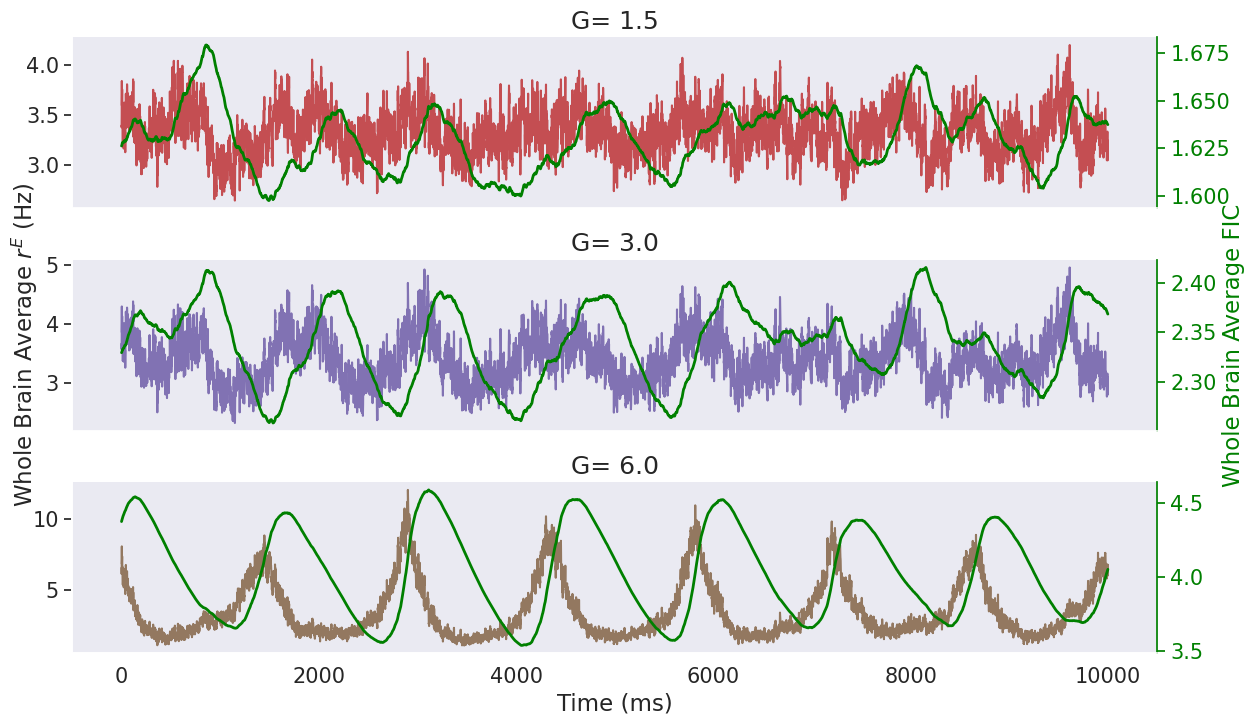

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Font sizes
TITLE = 18
LABEL = 16.5
TICKS = 15
LEGEND = 12

# Parameters
max_t = 10000
acor_tbase = np.arange(0, max_t)
figname = 'FIG_5'
sns.set_style("dark")
col_pal = sns.color_palette()

# Create the figure with improved spacing
fig, axes = plt.subplots(3, 1, figsize=(14, 8), gridspec_kw={'hspace': 0.3})

for e in range(3):
    ax = axes[e]
    ax.plot(acor_tbase, np.mean(e_rates_tseries[e, :, :max_t], axis=0), color=col_pal[3 + e])

    # Create a twin Axes for the right y-axis
    ax2 = ax.twinx()
    ax2.plot(acor_tbase, np.mean(fic_tseries[e, :, :max_t], axis=0), color='green', linewidth=2)

    # Labels and Titles
    if e==1:
        ax.set_ylabel(r'Whole Brain Average $r^E$ (Hz)', fontsize=LABEL)
        ax2.set_ylabel(r'Whole Brain Average FIC', fontsize=LABEL, color='green')

    ax.set_title(f'G= {gvals_tseries[e]}', fontsize=TITLE)

    # Customize the right y-axis ticks and line color
    ax2.yaxis.set_tick_params(color='green', labelcolor='green', labelsize=TICKS)
    ax2.spines['right'].set_color('green')

    # Hide x-axis ticks for the first two plots
    if e == 2:
        ax.set_xlabel('Time (ms)', fontsize=LABEL)
    else:
        ax.set_xticks([])

    # Axes properties
    ax.tick_params(axis='both', labelsize=TICKS)
    ax2.tick_params(axis='y', labelsize=TICKS)
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(e == 2)  # Bottom spine visible only for the last plot

#plt.tight_layout()

# Save the figure
fig.savefig(figfold + figname + '_A.png', dpi=300)
fig.savefig(figfold + figname + '_A.svg', dpi=300)
plt.show()


In [93]:

sns.set(style="darkgrid")

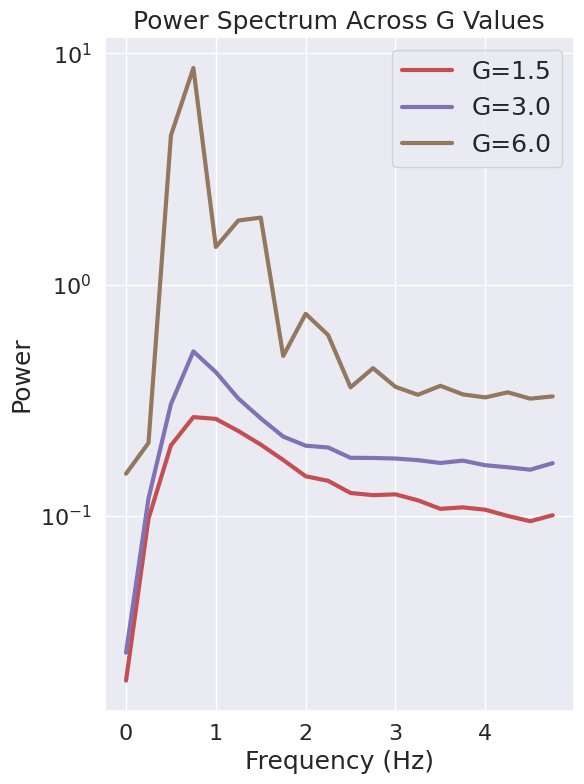

In [94]:
import matplotlib.pyplot as plt

# Font sizes
TITLE = 18
LABEL = 18
TICKS = 16
LEGEND = 18



# Parameters
figname = 'FIG_5_B'
sns.set_style("darkgrid")
# Create the figure
fig, ax = plt.subplots(figsize=(6, 8))

# Plot power spectra for different G values using semilogy
for i in range(3):
    freq, power, f, p = get_max_freq_and_power(e_rates_tseries[i])
    ax.semilogy(f[:20], (p[:, :20].T).mean(axis=1),
                label=f'G={gvals_tseries[i]}',
                color=col_pal[3 + i], linewidth=3)

# Labels, title, and ticks
ax.set_xlabel('Frequency (Hz)', fontsize=LABEL)
ax.set_ylabel('Power', fontsize=LABEL)
ax.set_title('Power Spectrum Across G Values', fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)

# Add legend
ax.legend(fontsize=LEGEND)

# Layout and save
plt.tight_layout()
#fig.savefig(figfold + figname + '.png', dpi=300)
#fig.savefig(figfold + figname + '.svg', dpi=300)
plt.show()


In [95]:
import os
arrays_to_save = [
    'max_freq_grid',
    'max_power_grid',
    'corr_to_sc_grid',
    'homeostatic_fittness_grid',
    'rates_grid',
    'fic_t_grid'
]
results_folder = "./Results/slow_waves08"

results_08 = {}
for array_name in arrays_to_save:
    file_name = os.path.join(results_folder, f"{array_name}.npy")
    results_08[array_name] = np.load(file_name)

results_folder = "./Results/slow_waves816"

results_816 = {}
for array_name in arrays_to_save:
    file_name = os.path.join(results_folder, f"{array_name}.npy")
    results_816[array_name] = np.load(file_name)

In [96]:
max_freq_grid = np.concatenate([results_08['max_freq_grid'],results_816['max_freq_grid']], axis=1)
max_power_grid = np.concatenate([results_08['max_power_grid'],results_816['max_power_grid']], axis=1)
corr_to_sc_grid = np.concatenate([results_08['corr_to_sc_grid'],results_816['corr_to_sc_grid']], axis=1)
homeostatic_fittness_grid = np.concatenate([results_08['homeostatic_fittness_grid'],results_816['homeostatic_fittness_grid']], axis=1)
rates_grid = np.concatenate([results_08['rates_grid'],results_816['rates_grid']], axis=1)
fic_t_grid = np.concatenate([results_08['fic_t_grid'],results_816['fic_t_grid']], axis=1)

mean_max_freq = max_freq_grid.mean(axis=0).T
mean_max_power = max_power_grid.mean(axis=0).T

In [147]:
sns.set(style="whitegrid", rc={"grid.linewidth": 0.45})

In [158]:
mean_max_freq[mean_max_freq > 0].min()

0.25

In [98]:
fic_t_grid.shape

(8, 60, 100, 200)

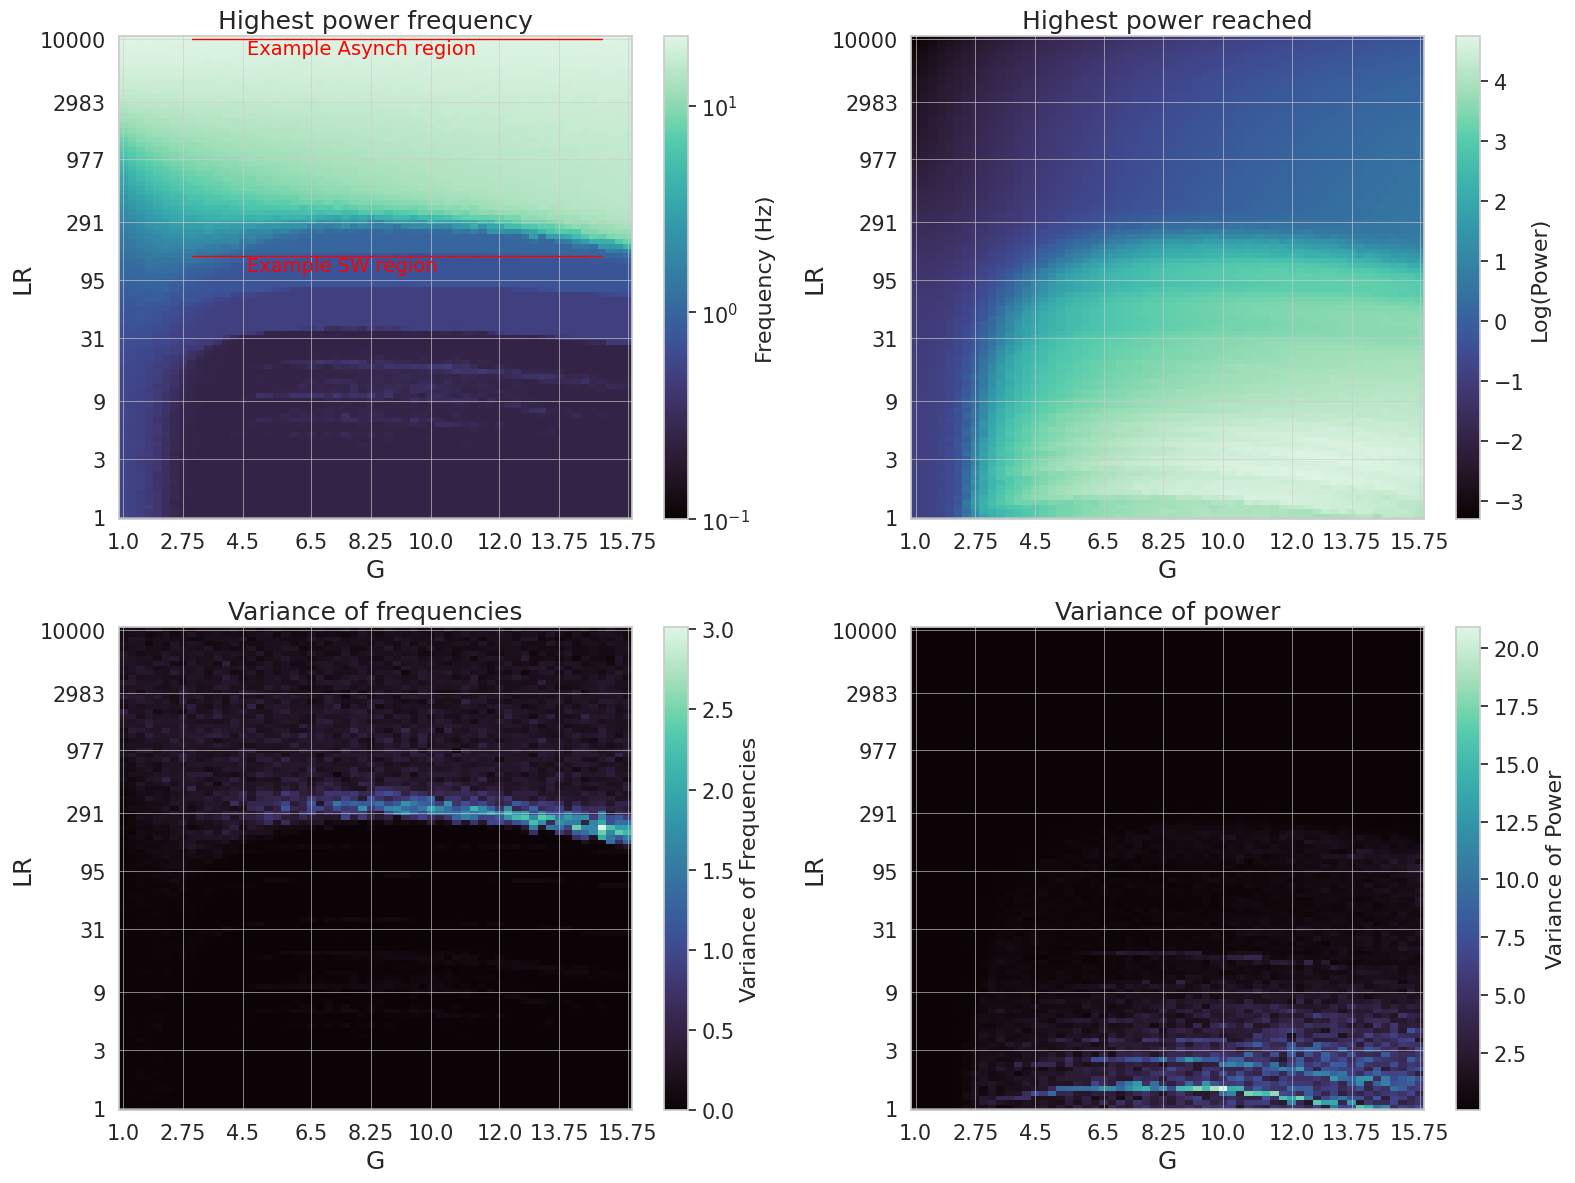

In [ ]:
from matplotlib.colors import LogNorm

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
TICKS = 15
LABEL = 18
COLORBAR = 16

figname_base = 'FIG_5_'

# FIG_2_A: Heatmap for max_freq_grid (Log Normalization)
im1 = axs[0, 0].imshow(mean_max_freq, aspect='auto', cmap='mako',
                       norm=LogNorm(vmin=0.1, vmax=mean_max_freq.max()),
                       origin='upper')
cbar1 = fig.colorbar(im1, ax=axs[0, 0])
#v1 = np.linspace(mean_max_freq[mean_max_freq > 0].min(), 15, 10)
#v1 = [mean_max_freq[mean_max_freq > 0].min(),1,10]
#cbar1.set_ticks(v1[:-4])  # Remove the 3 ticks preceding the last tick
#cbar1.set_ticklabels([f"{val:.1f}" for val in v1[:-4]])  # Format tick labels to one decimal place
#cbar1.set_ticks(v1)  # Remove the 3 ticks preceding the last tick
#cbar1.set_ticklabels([f"{val:.1f}" for val in v1])  # Format tick labels to one decimal place
cbar1.minorticks_off()
cbar1.set_label('Frequency (Hz)', fontsize=COLORBAR)
cbar1.ax.tick_params(labelsize=TICKS)

# Define G nd LR ranges
G_max = 16
G_step = 0.25
G_range = np.arange(1, G_max, G_step)
LR_range = np.logspace(0, 4, 100)

# Define tick indices and labels
lr_tick_indices = np.linspace(0, len(LR_range) - 1, 9, dtype=int)
lr_tick_labels = np.round(LR_range[lr_tick_indices], 2)
G_tick_indices = np.linspace(0, len(G_range) - 1, 9, dtype=int)
G_tick_labels = np.round(G_range[G_tick_indices], 2)


# Add fine red lines and annotations
G_3_idx = np.argmin(np.abs(G_range - 3))
G_16_idx = np.argmin(np.abs(G_range - 15))
lr_100_idx = np.argmin(np.abs(LR_range - 150))
axs[0, 0].plot([G_3_idx, G_16_idx], [lr_100_idx, lr_100_idx], color='red', linewidth=1)
axs[0, 0].text(14.5, lr_100_idx, 'Example SW region', color='red', fontsize=LABEL-4, verticalalignment='top')
lr_1000_idx = np.argmin(np.abs(LR_range - 10150))
axs[0, 0].plot([G_3_idx, G_16_idx], [lr_1000_idx, lr_1000_idx], color='red', linewidth=1)
axs[0, 0].text(14.5, lr_1000_idx, 'Example Asynch region', color='red', fontsize=LABEL-4, verticalalignment='top')

# Tick settings
axs[0, 0].set_xticks(G_tick_indices)
axs[0, 0].set_xticklabels(G_tick_labels, fontsize=TICKS)
axs[0, 0].set_yticks(lr_tick_indices)
axs[0, 0].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[0, 0].invert_yaxis()

# Labels and Title
axs[0, 0].set_xlabel('G', fontsize=LABEL)
axs[0, 0].set_ylabel('LR', fontsize=LABEL)
axs[0, 0].set_title('Highest power frequency', fontsize=TITLE)

# FIG_2_B: Heatmap for max_power_grid (Normal Display with log scale)
im2 = axs[0, 1].imshow(np.log(mean_max_power), aspect='auto', cmap='mako', origin='upper')
cbar2 = fig.colorbar(im2, ax=axs[0, 1])
cbar2.set_label('Log(Power)', fontsize=COLORBAR)
cbar2.ax.tick_params(labelsize=TICKS)

# Tick settings
axs[0, 1].set_xticks(G_tick_indices)
axs[0, 1].set_xticklabels(G_tick_labels, fontsize=TICKS)
axs[0, 1].set_yticks(lr_tick_indices)
axs[0, 1].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[0, 1].invert_yaxis()

# Labels and Title
axs[0, 1].set_xlabel('G', fontsize=LABEL)
axs[0, 1].set_ylabel('LR', fontsize=LABEL)
axs[0, 1].set_title('Highest power reached', fontsize=TITLE)

# Compute std values
std_max_freq = max_freq_grid.std(axis=0).T
std_max_power = max_power_grid.std(axis=0).T

# FIG_2_C: Heatmap for std_max_freq
im3 = axs[1, 0].imshow(std_max_freq, aspect='auto', cmap='mako', origin='upper')
cbar3 = fig.colorbar(im3, ax=axs[1, 0])
cbar3.set_label('Variance of Frequencies', fontsize=COLORBAR)
cbar3.ax.tick_params(labelsize=TICKS)

# Tick settings
axs[1, 0].set_xticks(G_tick_indices)
axs[1, 0].set_xticklabels(G_tick_labels, fontsize=TICKS)
axs[1, 0].set_yticks(lr_tick_indices)
axs[1, 0].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[1, 0].invert_yaxis()

# Labels and Title
axs[1, 0].set_xlabel('G', fontsize=LABEL)
axs[1, 0].set_ylabel('LR', fontsize=LABEL)
axs[1, 0].set_title('Variance of frequencies', fontsize=TITLE)

# FIG_2_D: Heatmap for std_max_power
im4 = axs[1, 1].imshow(std_max_power, aspect='auto', cmap='mako', origin='upper')
cbar4 = fig.colorbar(im4, ax=axs[1, 1])
cbar4.set_label('Variance of Power', fontsize=COLORBAR)
cbar4.ax.tick_params(labelsize=TICKS)

# Tick settings
axs[1, 1].set_xticks(G_tick_indices)
axs[1, 1].set_xticklabels(G_tick_labels, fontsize=TICKS)
axs[1, 1].set_yticks(lr_tick_indices)
axs[1, 1].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[1, 1].invert_yaxis()

# Labels and Title
axs[1, 1].set_xlabel('G', fontsize=LABEL)
axs[1, 1].set_ylabel('LR', fontsize=LABEL)
axs[1, 1].set_title('Variance of power', fontsize=TITLE)

plt.tight_layout()
#plt.savefig(figfold + figname_base + 'Combined.png', dpi=300)
#plt.savefig(figfold + figname_base + 'Combined.svg', dpi=300)
plt.show()


## Overlapping fitting with slow waves

## Plotting timeserires and autocorrelation function

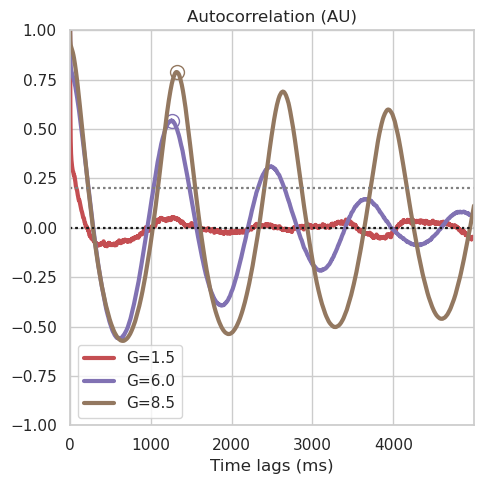

In [54]:
t_len = np.shape(acorrs)[1]
max_t = 5000
acor_tbase = np.arange(0,max_t)
acor_tbase_s = np.arange(0,max_t)*0.001
xcorr_tbase = np.arange(- max_t/2, max_t/2)

# Extacting max of the xcorr
sel_xcorr = np.vstack(([x[int(t_len - max_t/2):int(t_len + max_t/2)] for x in xcorr_rate_fic]))
max_xcorr_id = np.argmax(sel_xcorr, axis=1)
min_xcorr_id = np.argmin(sel_xcorr, axis=1)
# [[[sel_xcorr[x,min_xcorr_id[x]] for x in range(3)], xcorr_tbase[min_xcorr_id]],
# [[sel_xcorr[x,max_xcorr_id[x]] for x in range(3)], xcorr_tbase[max_xcorr_id]]]


pp = list()
figname = 'autocorr_and_cross_corr'
fig = plt.figure(figsize=(10, 5))
for e in range(3):
    plt.subplot(1,2,1)
    plt.plot(acor_tbase, acorrs[e,0:max_t], 
         color=col_pal[3+e], linewidth=3, label='G='+str(gvals_tseries[e]))
    if e>0:
        plt.plot(acorr_time[e],acorr_peak[e],'o',color=col_pal[3+e],
                 markersize=10, fillstyle='none')
    pp.append(auxp)
    plt.ylim([-1,1])
    plt.title('Autocorrelation (AU)')
    plt.xlabel('Time lags (ms)')
    plt.plot([acor_tbase[0],acor_tbase[-1]],[0,0],'k:')
    plt.plot([acor_tbase[0],acor_tbase[-1]],[0.2,0.2],':',color=[0.5,0.5,0.5])
    plt.xlim([acor_tbase[0],acor_tbase[-1]])
    if e==2:
        plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(xcorr_tbase, xcorr_rate_fic[e][int(t_len - max_t/2):int(t_len + max_t/2)], 
             color=col_pal[3+e], linewidth=3)
    plt.plot(xcorr_tbase[max_xcorr_id[e]], sel_xcorr[e,max_xcorr_id[e]],
            'o',color=col_pal[3+e],markersize=10, fillstyle='none')
    plt.plot(xcorr_tbase[min_xcorr_id[e]], sel_xcorr[e,min_xcorr_id[e]],
        'o',color=col_pal[3+e],markersize=10, fillstyle='none')
    plt.ylim([-1,1])
    plt.plot([0,0],[-1,1],'k:')
    plt.plot([xcorr_tbase[0],xcorr_tbase[-1]],[0,0],'k:')
    plt.xlim([xcorr_tbase[0],xcorr_tbase[-1]])
    plt.title('Cross-correlation ($<r^E>_{WB}$,<FIC>) (AU)')
    plt.xlabel('Time lags (ms)')
    



plt.tight_layout()
fig.savefig(figfold+figname+'.png', dpi=300)
fig.savefig(figfold+figname+'.pdf')
plt.show()

In [44]:
t_len = np.shape(acorrs)[1]
max_t = 5000
acor_tbase = np.arange(0,max_t)
acor_tbase_s = np.arange(0,max_t)*0.001
xcorr_tbase = np.arange(- max_t/2, max_t/2)

# Extacting max of the xcorr
sel_xcorr = np.vstack(([x[int(t_len - max_t/2):int(t_len + max_t/2)] for x in xcorr_rate_fic]))
max_xcorr_id = np.argmax(sel_xcorr, axis=1)
min_xcorr_id = np.argmin(sel_xcorr, axis=1)
# [[[sel_xcorr[x,min_xcorr_id[x]] for x in range(3)], xcorr_tbase[min_xcorr_id]],
# [[sel_xcorr[x,max_xcorr_id[x]] for x in range(3)], xcorr_tbase[max_xcorr_id]]]


pp = list()
figname = 'autocorr_and_cross_corr'
fig = plt.figure(figsize=(10, 5))
for e in range(3):
    plt.subplot(1,1,1)
    plt.plot(acor_tbase, acorrs[e,0:max_t], 
         color=col_pal[3+e], linewidth=3, label='G='+str(gvals_tseries[e]))
    if e>0:
        plt.plot(acorr_time[e],acorr_peak[e],'o',color=col_pal[3+e],
                 markersize=10, fillstyle='none')
    pp.append(auxp)
    plt.ylim([-1,1])
    plt.title('Autocorrelation (AU)')
    plt.xlabel('Time lags (ms)')
    plt.plot([acor_tbase[0],acor_tbase[-1]],[0,0],'k:')
    plt.plot([acor_tbase[0],acor_tbase[-1]],[0.2,0.2],':',color=[0.5,0.5,0.5])
    plt.xlim([acor_tbase[0],acor_tbase[-1]])
    if e==2:
        plt.legend()




plt.tight_layout()
plt.show()

NameError: name 'acorrs' is not defined

In [ ]:
# Sanity checks
fig = plt.figure(figsize=(14, 10))

# Correlation SC-FC
plt.subplot(2,4,1)
plt.imshow(np.mean(corr_to_sc_grid,axis=0).T,vmin=0, vmax=1,cmap='inferno', 
           interpolation='none',origin='lower', aspect='auto')
plt.yticks(ticks=np.arange(0,nlrs+1,10),labels=np.floor(10*np.logspace(0,3,11))/10)
plt.xticks(ticks=np.arange(0,ngs+1,10), labels=np.linspace(1,G_max,7))
plt.ylabel('Learning Rate')
plt.xlabel('Global Coupling')
plt.colorbar(label='Corr(SC,FC)')


plt.subplot(2,4,2)
plt.imshow(np.mean(corr_to_sc_grid,axis=0).T,vmin=0, vmax=1,cmap='inferno', 
           interpolation='none',origin='lower', aspect='auto')
plt.yticks(ticks=np.arange(0,nlrs+1,10),labels=np.floor(10*np.logspace(0,3,11))/10)
plt.xticks(ticks=np.arange(0,ngs+1,10), labels=np.linspace(1,G_max,7))
plt.ylabel('Learning Rate')
plt.xlabel('Global Coupling')
plt.colorbar(label='Corr(SC,FC)')

# Chimeras

In [56]:
# Define the data folder path
datafolder = '/home/ivan.mindlin/Desktop/DatosParaRuben/'

# Load the data
e_rates_dyn_list = np.load(datafolder + 'slow_waves/time_series_examples/LR_rates_results.npy', allow_pickle=True)
inh_rates_dyn_list = np.load(datafolder + 'slow_waves/time_series_examples/LR_rates_inh_results.npy', allow_pickle=True)
fic_dyn_list = np.load(datafolder + 'slow_waves/time_series_examples/LR_fic_t_results.npy', allow_pickle=True)
LR_values = np.load(datafolder + 'slow_waves/time_series_examples/LR_LR_values.npy', allow_pickle=True)
params = np.load(datafolder + 'slow_waves/time_series_examples/LR_params.npy', allow_pickle=True)

In [57]:
figfold = '/home/ivan.mindlin/Desktop/DatosParaRuben/Figuras/panels/'

/tmp/ipykernel_334791/2328929368.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


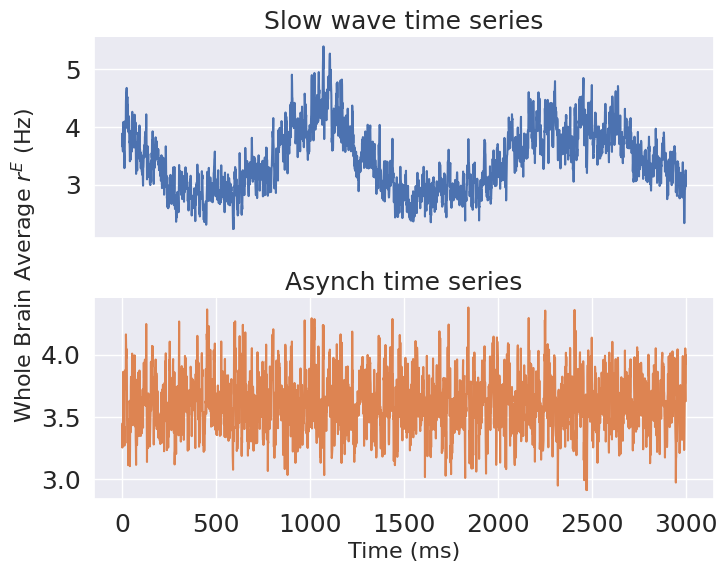

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Font sizes (using notebook variables)
TITLE = 18
LABEL = 16
TICKS = 18
LEGEND = 18

max_t = 3000
acor_tbase = np.arange(0, max_t)
figname = 'FIG_6_A'
col_pal = sns.color_palette()
START = 2000
# Create the figure with two subplots (for LR=100 and LR=10000) at G=0.5
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'hspace': 0.3})

for i in range(2):
    ax = axes[i]
    # Plot the average excitatory rate for the i-th dyn time series sample
    ax.plot(acor_tbase, np.mean(e_rates_dyn_list[i, :, START:START+max_t], axis=0), color=col_pal[i])
    
    # Set title with the corresponding LR value and fixed G=0.5
    if i == 0:    
        ax.set_title(f'Slow wave time series', fontsize=TITLE)
    else:
        ax.set_title(f'Asynch time series', fontsize=TITLE)
    
    # Set x-label only for the bottom subplot
    if i == 1:
        ax.set_xlabel('Time (ms)', fontsize=LABEL)
    else:
        ax.set_xticks([])
    
    # Hide the top spine
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', labelsize=TICKS)

# Add a shared ylabel in the middle of both subplots
fig.text(0.02, 0.5, r'Whole Brain Average $r^E$ (Hz)', va='center', rotation='vertical', fontsize=LABEL)
plt.tight_layout()
# Save the figure
fig.savefig(figfold + figname + '.png', dpi=300)
fig.savefig(figfold + figname + '.svg', dpi=300)
plt.show()


In [59]:
from joblib import Parallel, delayed
from scipy.signal import welch
import fastdyn_fic_dmf as dmf
def sim_run(G, LR, SEED, NB_STEPS=50000):
    """
    INPUTS:
    G: float, global coupling
    LR: array, learning rate (Homogeneous or heterogenos. Decay will be calcualted for each region with this)
    SEED: int, random seed
    OUTPUTS:
    rates_dyn: np.array, dynamic of rates
    rates_inh_dyn: np.array, dynamic of inhibitory rates
    bold_dyn: np.array, dynamic of BOLD signal
    fic_t_dyn: np.array, dynamic of FIC

    """
    
    params = dmf.default_params(C=C)
    fit_res = np.load("./data/fit_res_3-44.npy")
    b = fit_res[0] # First element is the slope
    a = fit_res[1]
    params['G'] = G
    params['seed'] = SEED
    params['obj_rate'] = 3.44
    DECAY = np.exp(a+np.log(LR)*b)    
    params['lr_vector'] = LR
    params['taoj_vector'] =  DECAY
    params['J'] = 0.75*params['G']*params['C'].sum(axis=0).squeeze() + 1
    params["with_decay"] = True
    params["with_plasticity"] = True
    params['return_bold'] = False
    params["return_fic"] = True
    params["return_rate"] = True
    rates_dyn, rates_inh_dyn, _, fic_t_dyn = dmf.run(params, NB_STEPS)
    return rates_dyn, rates_inh_dyn, fic_t_dyn

def sim_run_notplastic(G, SEED, NB_STEPS=50000):
    """
    INPUTS:
    G: float, global coupling    
    SEED: int, random seed
    OUTPUTS:
    rates_dyn: np.array, dynamic of rates    

    """
    
    params = static_dmf.default_params(C=C)    
    params['G'] = G
    params['seed'] = SEED
    params['obj_rate'] = 3.44    
    params['J'] = 0.75*params['G']*params['C'].sum(axis=0).squeeze() + 1        
    rates_dyn = static_dmf.run(params, NB_STEPS,'rate')
    return rates_dyn

import numpy as np

def vectorize_along_axis(axis=0):
    def decorator(func):
        def wrapper(data, *args, **kwargs):
            # if the data is 1D, just call the function directly
            if data.ndim == 1:
                return func(data, *args, **kwargs)
            # otherwise, apply the function along the specified axis
            return np.apply_along_axis(func, axis, data, *args, **kwargs)
        return wrapper
    return decorator

@vectorize_along_axis(axis=0)
def get_autcorr(rates):
    """Get the autocorrelation function from a 1D rates vector."""
    signal = rates - np.mean(rates)
    # Calculate autocorrelation function (full convolution)
    autocorr = np.correlate(signal, signal, mode='full')
    # Normalize: divide by the variance and length of the signal
    autocorr = autocorr / (np.var(signal) * len(signal))
    # Only keep the second half (non-negative lags)
    autocorr = autocorr[len(signal)-1:]
    return autocorr


def get_max_freq_and_power(rates):
    freqs, psd = welch(rates, fs=1000,axis=1,nperseg=4*1000,noverlap=2*1000)
    max_freq_id = np.argmax(psd[:,:100],axis=1)
    max_freqs = freqs[max_freq_id]
    max_power = np.max(psd[:,:100],axis=1)
    return max_freqs, max_power,freqs,psd

def get_avg_max_freq_and_power(rates_avg):
    freqs, psd = welch(rates_avg, fs=1000,axis=0,nperseg=4*1000,noverlap=2*1000)
    max_freq_id = np.argmax(psd[:100])
    max_freqs = freqs[max_freq_id]
    max_power = np.max(psd[:100])
    return max_freqs, max_power,freqs,psd

import numpy as np
import os
from joblib import Parallel, delayed

LR_HOMO = 100
LR_HOMO_VEC = np.ones(200)*LR_HOMO
SEED = 1
MAX_LAGS = 500
BURNOUT = 5000
AUTOCORR_TMAX = 5000
NB_STEPS = 55000
G_VAL = 3.5
SEED_BASE = 100
N = C.shape[0]

def run_simulation(idx, lr):
    SEED = SEED_BASE + idx
    # Create a homogeneous LR vector for all regions
    LR_VEC = np.ones(N) * lr
    # Run simulation (assuming sim_run returns rates, inhibitory rates and fic_t in that order)
    rates, _, _ = sim_run(G_VAL, LR_VEC, SEED, NB_STEPS)
    # Discard burnout period
    return rates[:, BURNOUT:]

def run_simulation_heterogeneous(idx, lr_hom, lr_het,het_regions_idx):
    SEED = SEED_BASE + idx
    # Create a homogeneous LR vector for all regions
    LR_VEC = np.ones(N) * lr_hom
    LR_VEC[het_regions_idx] = lr_het
    # Run simulation (assuming sim_run returns rates, inhibitory rates and fic_t in that order)
    rates, _, _ = sim_run(G_VAL, LR_VEC, SEED, NB_STEPS)
    # Discard burnout period
    return rates[:, BURNOUT:]

def run_simulation_notplastic(idx):
    SEED = SEED_BASE + idx    
    # Run simulation (assuming sim_run returns rates, inhibitory rates and fic_t in that order)
    rates = sim_run_notplastic(G_VAL_NOTPLASTIC, SEED, NB_STEPS)
    # Discard burnout period
    return rates[:, BURNOUT:]


In [60]:
data_folder = "/network/iss/cohen/data/Ivan/dyn_fic_dmf_simulations/Results"
NB_STEPS = 55000
# Create a HIGH_LR homogeneous simaultion
HIGH_LR = 10000
NREPS = 100
G_VAL = 3.5
if os.path.exists(f"{data_folder}/homogeneous/g_{G_VAL}_lr_{HIGH_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy"):
    print("Loading high lr")
    rates_all_high_lr = np.load(f"{data_folder}/homogeneous/g_{G_VAL}_lr_{HIGH_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy")
else:
    simulations = Parallel(n_jobs=64)(delayed(run_simulation)(idx, HIGH_LR) for idx in range(NREPS))
    rates_all_high_lr = np.array(simulations)
    save_path = f"{data_folder}/homogeneous/g_{G_VAL}_lr_{HIGH_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy"
    np.save(save_path, rates_all_high_lr)
# Create a LOW_LR homogeneous simaultion
LOW_LR = 100
# If the file already exists, load it instead of running the simulation
if os.path.exists(f"{data_folder}/homogeneous/g_{G_VAL}_lr_{LOW_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy"):
    print("Loading low lr")
    rates_all_low_lr = np.load(f"{data_folder}/homogeneous/g_{G_VAL}_lr_{LOW_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy")
else:
    simulations = Parallel(n_jobs=64)(delayed(run_simulation)(idx, LOW_LR) for idx in range(NREPS))
    rates_all_low_lr = np.array(simulations)
    save_path = f"{data_folder}/homogeneous/g_{G_VAL}_lr_{LOW_LR}_{NREPS}reps_{NB_STEPS//1000}ksteps.npy"
    np.save(save_path, rates_all_low_lr)





Loading high lr
Loading low lr


In [ ]:
# load rates_all_low_lr and rates_all_high_lr
rates_all_low_lr = np.load(f"{data_folder}/rates_all_low_lr.npy")
rates_all_high_lr = np.load(f"{data_folder}/rates_all_high_lr.npy")

In [61]:
# High LR
results_high_lr = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_high_lr)
max_freqs_all_high_lr, max_powers_all_high_lr, freqs_all_high_lr, psd_all_high_lr = zip(*results_high_lr)
max_freqs_all_high_lr = np.array(max_freqs_all_high_lr)
max_powers_all_high_lr = np.array(max_powers_all_high_lr)
freqs_all_high_lr = np.array(freqs_all_high_lr)
psd_all_high_lr = np.array(psd_all_high_lr)

# Low LR
results_low_lr = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_low_lr)
max_freqs_all_low_lr, max_powers_all_low_lr, freqs_all_low_lr, psd_all_low_lr = zip(*results_low_lr)
max_freqs_all_low_lr = np.array(max_freqs_all_low_lr)
max_powers_all_low_lr = np.array(max_powers_all_low_lr)
freqs_all_low_lr = np.array(freqs_all_low_lr)
psd_all_low_lr = np.array(psd_all_low_lr)

In [ ]:
rates_avg_reg_high_lr = np.mean(rates_all_high_lr, axis=0)
rates_avg_reg_low_lr = np.mean(rates_all_low_lr, axis=0)
# High LR
results_high_lr = Parallel(n_jobs=16)(delayed(get_avg_max_freq_and_power)(rates) for rates in rates_avg_reg_high_lr)
max_freqs_avg_high_lr, max_powers_avg_high_lr, freqs_all_avg_high_lr, psd_all_avg_high_lr = zip(*results_high_lr)
max_freqs_avg_high_lr = np.array(max_freqs_avg_high_lr)
max_powers_avg_high_lr = np.array(max_powers_avg_high_lr)
freqs_all_avg_high_lr = np.array(freqs_all_avg_high_lr)
psd_all_avg_high_lr = np.array(psd_all_avg_high_lr)

# Low LR
results_low_lr = Parallel(n_jobs=16)(delayed(get_avg_max_freq_and_power)(rates) for rates in rates_avg_reg_low_lr)
max_freqs_avg_low_lr, max_powers_avg_low_lr, freqs_all_avg_low_lr, psd_all_avg_low_lr = zip(*results_low_lr)
max_freqs_avg_low_lr = np.array(max_freqs_avg_low_lr)
max_powers_avg_low_lr = np.array(max_powers_avg_low_lr)
freqs_all_avg_low_lr = np.array(freqs_all_avg_low_lr)
psd_all_avg_low_lr = np.array(psd_all_avg_low_lr)



(100, 200)

In [62]:
from bct import score_wu, rich_club_wu
C = loadmat('./data/DTI_fiber_consensus_HCP.mat')['connectivity'][:200, :200]
# Select the nodes with the hihgest node strength from SC matrix C
C = 0.2*C/np.max(C)
node_strength = np.mean(C,axis=0)
# Get the 10 lowest regions
most_connected = np.argsort(node_strength)[::-1]

score_levels = np.arange(0.02,1.6,0.01)
score_idxs = []
for level in score_levels:
    score, sn = score_wu(C,level)
    # Get the indices from score that have > 0 values
    if sn>0:
        score_idxs.append(np.where(np.sum(score,axis=0) > 0)[0]) 

Loading quimeric deltas


In [97]:
NTH=13
NTH_IDX=0
SELECTED_REGIONS = most_connected[:NTH]
LR_HOMO = 10000
LR_HOMO_VEC = np.ones(200)*LR_HOMO
LR_HET=100
LR_HET_VEC = LR_HOMO_VEC.copy()
LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
print("Simulating")
simulations = Parallel(n_jobs=32)(delayed(run_simulation_heterogeneous)(idx, LR_HOMO,LR_HET,SELECTED_REGIONS) for idx in range(100))
rates_all_het = np.array(simulations)
print("Calculating power")
results = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_het)
for idx, (max_freqs, max_powers, _, _) in enumerate(results):
    max_freqs_all_het[NTH_IDX,idx] = max_freqs
    max_powers_all_het[NTH_IDX,idx] = max_powers
print("Crafting quimeric delta")    

Simulating
Calculating power
Crafting quimeric delta


Loading quimeric deltas
Significant difference for 13 regions: p-value = 0.0139
Significant difference for 78 regions: p-value = 0.0000
Significant difference for 102 regions: p-value = 0.0000
Significant difference for 134 regions: p-value = 0.0034
Significant difference for 152 regions: p-value = 0.0084


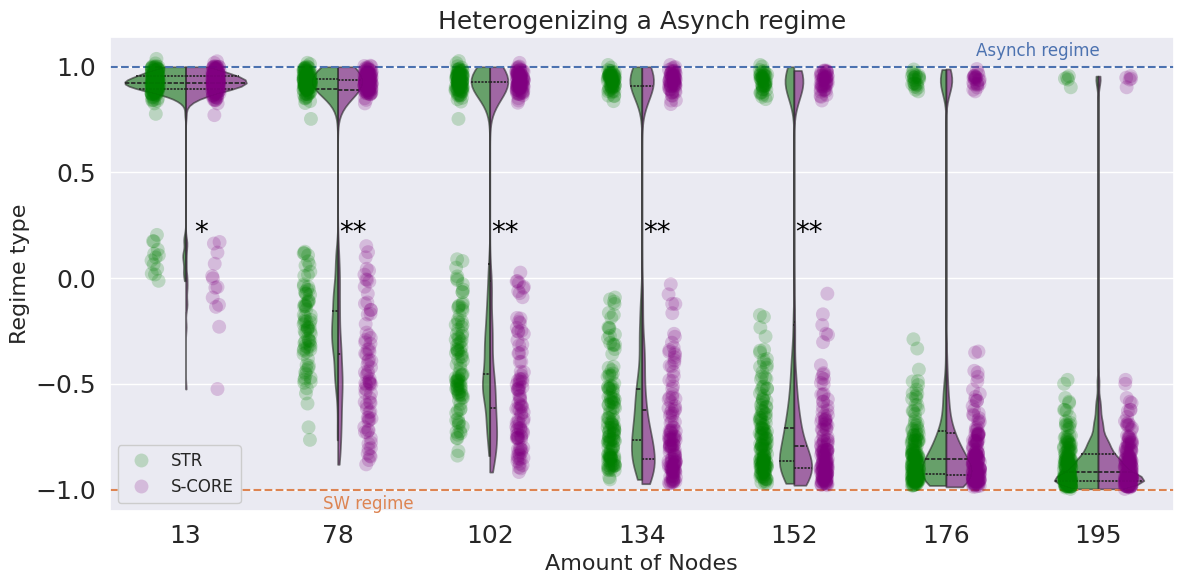

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd
sns.set(style="darkgrid")

G_VAL = 3.5
LR_HOMO = 10000
LR_HET = 100
score_lengths = [len(x) for x in score_idxs]
cherry_pick_scores_idx = [-1,-3,-5,-10,-15,-20,-30]
amount_of_regions = [score_lengths[x] for x in cherry_pick_scores_idx ]
if not os.path.exists(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}"):
    LR_HOMO_VEC = np.ones(200)*LR_HOMO
    MAX_LAGS = 500
    BURNOUT = 5000
    AUTOCORR_TMAX = 3000
    
    quimeric_delta = np.zeros((len(amount_of_regions),200))
    max_freqs_all_het = np.zeros((len(amount_of_regions),100,200))
    max_powers_all_het = np.zeros((len(amount_of_regions),100,200))
    for NTH_IDX,NTH in enumerate(amount_of_regions):
        print(f"Doing for {NTH} regions")
        SELECTED_REGIONS = most_connected[:NTH]
        LR_HET_VEC = LR_HOMO_VEC.copy()
        LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
        print("Simulating")
        simulations = Parallel(n_jobs=32)(delayed(run_simulation_heterogeneous)(idx, LR_HOMO,LR_HET,SELECTED_REGIONS) for idx in range(100))
        rates_all_het = np.array(simulations)
        print("Calculating power")
        results = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_het)
        for idx, (max_freqs, max_powers, _, _) in enumerate(results):
            max_freqs_all_het[NTH_IDX,idx] = max_freqs
            max_powers_all_het[NTH_IDX,idx] = max_powers
        print("Crafting quimeric delta")    
        quimeric_delta[NTH_IDX] = 2 * (max_freqs_all_het[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

    G_VAL = 3.5
    LR_HOMO = 10000
    LR_HOMO_VEC = np.ones(200)*LR_HOMO
    LR_HET = 100
    MAX_LAGS = 500
    BURNOUT = 5000
    AUTOCORR_TMAX = 3000
   

    quimeric_delta_score = np.zeros((len(cherry_pick_scores_idx),200))
    max_freqs_all_het_score = np.zeros((len(cherry_pick_scores_idx),100,200))
    max_powers_all_het_score = np.zeros((len(cherry_pick_scores_idx),100,200))
    for NTH_IDX,NTH in enumerate(cherry_pick_scores_idx):
        print(f"Doing for {NTH} regions")
        SELECTED_REGIONS = score_idxs[NTH]
        LR_HET_VEC = LR_HOMO_VEC.copy()
        LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
        print("Simulating")
        simulations = Parallel(n_jobs=32)(delayed(run_simulation_heterogeneous)(idx, LR_HOMO,LR_HET,SELECTED_REGIONS) for idx in range(100))
        rates_all_het = np.array(simulations)
        print("Calculating power")
        results = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_het)
        for idx, (max_freqs, max_powers, _, _) in enumerate(results):
            max_freqs_all_het_score[NTH_IDX,idx] = max_freqs
            max_powers_all_het_score[NTH_IDX,idx] = max_powers
        print("Crafting quimeric delta")    
        quimeric_delta_score[NTH_IDX] = 2 * (max_freqs_all_het_score[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

    os.mkdir(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}")
    # Save the results
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta.npy", quimeric_delta)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta_score.npy", quimeric_delta_score)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het.npy", max_freqs_all_het)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het_score.npy", max_freqs_all_het_score)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het.npy", max_powers_all_het)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het_score.npy", max_powers_all_het_score)
else:
    # Load the previously saved data
    print("Loading quimeric deltas")
    quimeric_delta = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta.npy")
    quimeric_delta_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta_score.npy")
    max_freqs_all_het = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het.npy")
    max_freqs_all_het_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het_score.npy")
    max_powers_all_het = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het.npy")
    max_powers_all_het_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het_score.npy")


# Font sizes
TITLE = 18
LABEL = 16
TICKS = 18
LEGEND = 18

# Parameters
figname = 'FIG_6_C'

# Prepare a tidy DataFrame for plotting
data = pd.DataFrame({
    'value': np.concatenate([quimeric_delta.flatten(), quimeric_delta_score.flatten()]),
    'group': ['STR'] * quimeric_delta.size + ['S-CORE'] * quimeric_delta_score.size,
    'amount_of_regions': np.concatenate([np.repeat(amount_of_regions, 200), np.repeat(amount_of_regions, 200)])
})

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Add dashed lines
ax.axhline(y=1, color=sns.color_palette()[0], linestyle='--')
ax.text(5.2, 1.05, 'Asynch regime', color=sns.color_palette()[0], fontsize=12, ha='left')

ax.axhline(y=-1, color=sns.color_palette()[1], linestyle='--')
ax.text(1.5, -1.09, 'SW regime', color=sns.color_palette()[1], fontsize=12, ha='right')

# Strip plot
sns.stripplot(data=data, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, 
              palette=['green', 'purple'], s=10, alpha=0.2)
strip_handles, strip_labels = ax.get_legend_handles_labels()

# Violin plot
# Clip the data from 1 to -1
data['value'] = np.clip(data['value'], -1, 1)
sns.violinplot(data=data, x='amount_of_regions', y='value', hue='group', ax=ax, 
               palette=['green', 'purple'], split=True, inner='quartile', bw_method=0.1,cut=0, alpha=0.6)

# Statistical tests: compare STR and S-CORE per amount_of_regions.
unique_amounts = sorted(data['amount_of_regions'].unique())

for idx_amt,amt in enumerate(unique_amounts):
    subset = data[data['amount_of_regions'] == amt]
    values_str = subset[subset['group'] == 'STR']['value']
    values_score = subset[subset['group'] == 'S-CORE']['value']
    values_str = [x for x in values_str if x < 0.5]
    values_score = [x for x in values_score if x < 0.5]
    stat, p_val = ttest_ind(values_str, values_score)
    if p_val < 0.05:
        print(f"Significant difference for {amt} regions: p-value = {p_val:.4f}")
        y_max = subset['value'].max()
        # Annotate star above the max value with a small offset
        ax.text(0.1+idx_amt, 0.15, '**' if p_val<0.01 else '*' , ha='center', va='bottom', color='black', fontsize=20)

# Labels, title, and legend
ax.set_xlabel("Amount of Nodes", fontsize=LABEL)
ax.set_ylabel("Regime type", fontsize=LABEL)
ax.set_title("Heterogenizing a Asynch regime", fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)
ax.set_yticks([1, 0.5, 0, -0.5, -1])
ax.legend(strip_handles, strip_labels, fontsize=12, title_fontsize=14, loc='lower left', framealpha=1)

# Layout and save
plt.tight_layout()
fig.savefig(os.path.join(figfold, figname + '.png'), dpi=300)
fig.savefig(os.path.join(figfold, figname + '.svg'), dpi=300)
plt.show()


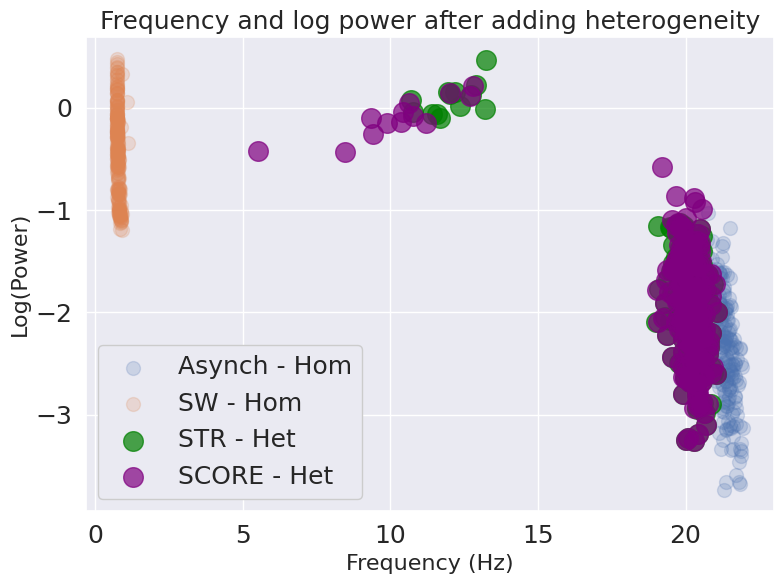

In [74]:
from turtle import color
import matplotlib.pyplot as plt

# Font sizes
TITLE = 18
LABEL = 16
TICKS = 18
LEGEND = 18

# Parameters
figname = 'FIG_6_B'

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plots for high and low learning rates
ax.scatter(max_freqs_all_high_lr.mean(axis=0), np.log(max_powers_all_high_lr.mean(axis=0)), label="Asynch - Hom", alpha=0.2, s=100)
ax.scatter(max_freqs_all_low_lr.mean(axis=0), np.log(max_powers_all_low_lr.mean(axis=0)), label="SW - Hom", alpha=0.2, s=100)
plt.scatter(max_freqs_all_het[0].mean(axis=0), np.log(max_powers_all_het[0].mean(axis=0)), label="STR - Het", alpha=0.7, s=200, color='green')
plt.scatter(max_freqs_all_het_score[0].mean(axis=0), np.log(max_powers_all_het_score[0].mean(axis=0)), label="SCORE - Het", alpha=0.7, s=200, color='purple')

# Labels, title, and legend
ax.set_xlabel("Frequency (Hz)", fontsize=LABEL)
ax.set_ylabel("Log(Power)", fontsize=LABEL)
ax.set_title("Frequency and log power after adding heterogeneity", fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)
ax.legend(fontsize=LEGEND, loc='lower left', framealpha=1)

# Layout and save
plt.tight_layout()
fig.savefig(os.path.join(figfold, figname + '.png'), dpi=300)
fig.savefig(figfold + figname + '.svg', dpi=300)
plt.show()


Loading quimeric deltas


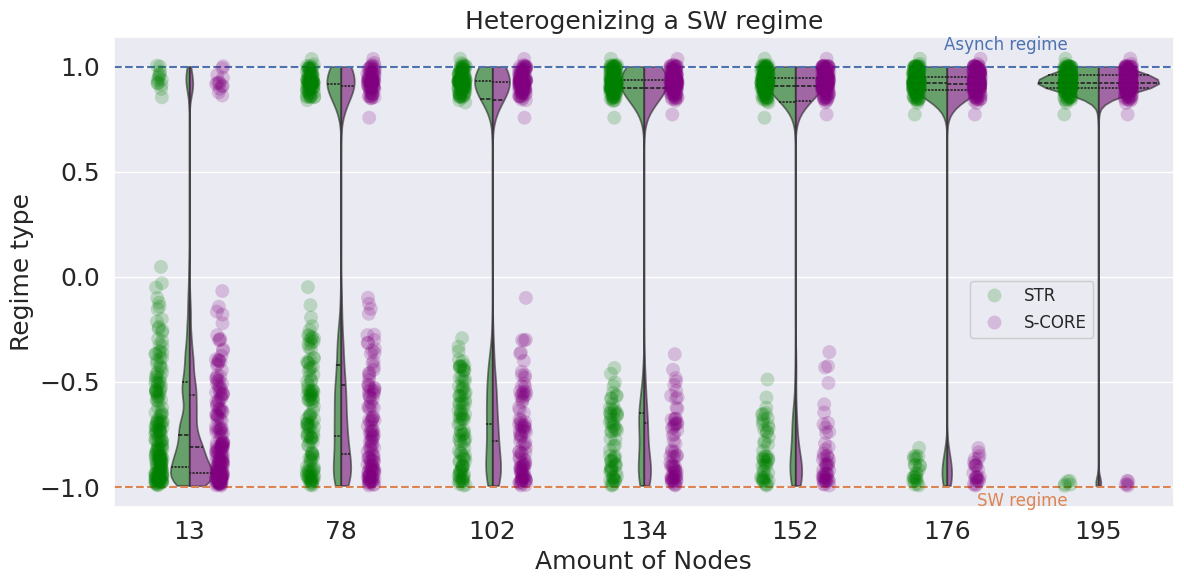

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


G_VAL = 3.5
LR_HOMO = 100
LR_HET = 10000
score_lengths = [len(x) for x in score_idxs]
cherry_pick_scores_idx = [-1,-3,-5,-10,-15,-20,-30]
amount_of_regions = [score_lengths[x] for x in cherry_pick_scores_idx ]
if not os.path.exists(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}"):
    LR_HOMO_VEC = np.ones(200)*LR_HOMO
    MAX_LAGS = 500
    BURNOUT = 5000
    AUTOCORR_TMAX = 3000
    
    quimeric_delta = np.zeros((len(amount_of_regions),200))
    max_freqs_all_het = np.zeros((len(amount_of_regions),100,200))
    max_powers_all_het = np.zeros((len(amount_of_regions),100,200))
    for NTH_IDX,NTH in enumerate(amount_of_regions):
        print(f"Doing for {NTH} regions")
        SELECTED_REGIONS = most_connected[:NTH]
        LR_HET_VEC = LR_HOMO_VEC.copy()
        LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
        print("Simulating")
        simulations = Parallel(n_jobs=32)(delayed(run_simulation_heterogeneous)(idx, LR_HOMO,LR_HET,SELECTED_REGIONS) for idx in range(100))
        rates_all_het = np.array(simulations)
        print("Calculating power")
        results = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_het)
        for idx, (max_freqs, max_powers, _, _) in enumerate(results):
            max_freqs_all_het[NTH_IDX,idx] = max_freqs
            max_powers_all_het[NTH_IDX,idx] = max_powers
        print("Crafting quimeric delta")    
        quimeric_delta[NTH_IDX] = 2 * (max_freqs_all_het[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

    G_VAL = 3.5
    LR_HOMO = 10000
    LR_HOMO_VEC = np.ones(200)*LR_HOMO
    LR_HET = 100
    MAX_LAGS = 500
    BURNOUT = 5000
    AUTOCORR_TMAX = 3000
   

    quimeric_delta_score = np.zeros((len(cherry_pick_scores_idx),200))
    max_freqs_all_het_score = np.zeros((len(cherry_pick_scores_idx),100,200))
    max_powers_all_het_score = np.zeros((len(cherry_pick_scores_idx),100,200))
    for NTH_IDX,NTH in enumerate(cherry_pick_scores_idx):
        print(f"Doing for {NTH} regions")
        SELECTED_REGIONS = score_idxs[NTH]
        LR_HET_VEC = LR_HOMO_VEC.copy()
        LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
        print("Simulating")
        simulations = Parallel(n_jobs=32)(delayed(run_simulation_heterogeneous)(idx, LR_HOMO,LR_HET,SELECTED_REGIONS) for idx in range(100))
        rates_all_het = np.array(simulations)
        print("Calculating power")
        results = Parallel(n_jobs=32)(delayed(get_max_freq_and_power)(rates) for rates in rates_all_het)
        for idx, (max_freqs, max_powers, _, _) in enumerate(results):
            max_freqs_all_het_score[NTH_IDX,idx] = max_freqs
            max_powers_all_het_score[NTH_IDX,idx] = max_powers
        print("Crafting quimeric delta")    
        quimeric_delta_score[NTH_IDX] = 2 * (max_freqs_all_het_score[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

    os.mkdir(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}")
    # Save the results
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta.npy", quimeric_delta)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta_score.npy", quimeric_delta_score)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het.npy", max_freqs_all_het)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het_score.npy", max_freqs_all_het_score)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het.npy", max_powers_all_het)
    np.save(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het_score.npy", max_powers_all_het_score)
else:
    # Load the previously saved data
    print("Loading quimeric deltas")
    quimeric_delta = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta.npy")
    quimeric_delta_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/quimeric_delta_score.npy")
    max_freqs_all_het = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het.npy")
    max_freqs_all_het_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_freqs_all_het_score.npy")
    max_powers_all_het = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het.npy")
    max_powers_all_het_score = np.load(f"{data_folder}/Quimeric_LR{LR_HOMO}_to_{LR_HET}/max_powers_all_het_score.npy")


# Font sizes

TITLE = 18
LABEL = 18
TICKS = 18
LEGEND = 18

# Parameters
figname = 'FIG_6_D'
# Prepare a tidy DataFrame for plotting
data = pd.DataFrame({
    'value': np.concatenate([quimeric_delta.flatten(), quimeric_delta_score.flatten()]),
    'group': ['STR'] * quimeric_delta.size + ['S-CORE'] * quimeric_delta_score.size,
    'amount_of_regions': np.concatenate([np.repeat(amount_of_regions, 200), np.repeat(amount_of_regions, 200)])
})

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Strip plot with lower alpha to match previous panel style
sns.stripplot(data=data, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, 
              palette=['green', 'purple'], s=10, alpha=0.2)
strip_handles, strip_labels = ax.get_legend_handles_labels()

# Violin plot with the same settings as before
# Clip the data from 1 to -1
data['value'] = np.clip(data['value'], -1, 1)
sns.violinplot(data=data, x='amount_of_regions', y='value', hue='group', ax=ax, 
               palette=['green', 'purple'], split=True, inner='quartile', bw_method=0.1, cut=0, alpha=0.6)

# Add dashed lines using the same style as in the previous panel
ax.axhline(y=1, color=sns.color_palette()[0], linestyle='--')
ax.text(5.8, 1.08, 'Asynch regime', color=sns.color_palette()[0], fontsize=12, ha='right')

ax.axhline(y=-1, color=sns.color_palette()[1], linestyle='--')
ax.text(5.8, -1.09, 'SW regime', color=sns.color_palette()[1], fontsize=12, ha='right')

# Labels, title, and legend
ax.set_xlabel("Amount of Nodes", fontsize=LABEL)
ax.set_ylabel("Regime type", fontsize=LABEL)
ax.set_title("Heterogenizing a SW regime", fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)
ax.set_yticks([1, 0.5, 0, -0.5, -1])
# Manually set the legend box position
ax.legend(strip_handles, strip_labels, fontsize=12, title_fontsize=14, framealpha=1, bbox_to_anchor=(0.8, 0.5), loc='upper left')

# Layout and save
plt.tight_layout()
fig.savefig(os.path.join(figfold, figname + '.png'), dpi=300)
fig.savefig(os.path.join(figfold, figname + '.svg'), dpi=300)
plt.show()
